In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("English_Premier_League_data_2009-2019.csv")
df.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,E0,2009-08-15 00:00:00,Aston Villa,Wigan,0,2,A,0,1,A,...,5,7,15,14,4,6,2,2,0,0
1,E0,2009-08-15 00:00:00,Blackburn,Man City,0,2,A,0,1,A,...,9,5,12,9,5,4,2,1,0,0
2,E0,2009-08-15 00:00:00,Bolton,Sunderland,0,1,A,0,1,A,...,3,13,16,10,4,7,2,1,0,0
3,E0,2009-08-15 00:00:00,Chelsea,Hull,2,1,H,1,1,D,...,12,3,13,15,12,4,1,2,0,0
4,E0,2009-08-15 00:00:00,Everton,Arsenal,1,6,A,0,3,A,...,5,9,11,13,4,9,0,0,0,0


In [3]:
df.shape

(3800, 23)

In [4]:
df.drop('Div',axis=1,inplace=True)

In [5]:
df['HomeTeam'].sort_values().unique()

array(['Arsenal', 'Aston Villa', 'Birmingham', 'Blackburn', 'Blackpool',
       'Bolton', 'Bournemouth', 'Brighton', 'Burnley', 'Cardiff',
       'Chelsea', 'Crystal Palace', 'Everton', 'Fulham', 'Huddersfield',
       'Hull', 'Leicester', 'Liverpool', 'Man City', 'Man United',
       'Middlesbrough', 'Newcastle', 'Norwich', 'Portsmouth', 'QPR',
       'Reading', 'Southampton', 'Stoke', 'Sunderland', 'Swansea',
       'Tottenham', 'Watford', 'West Brom', 'West Ham', 'Wigan', 'Wolves'],
      dtype=object)

In [6]:
recent_teams = ['Chelsea','Liverpool','Leicester','Southampton','Everton','Tottenham','Wolves',
'Aston Villa','Arsenal','Man City','Newcastle','Crystal Palace','West Ham','Man United',
'Brighton','Fulham','West Brom','Burnley']

In [7]:
df = df[(df['HomeTeam'].isin(recent_teams))]

In [8]:
df = df[(df['AwayTeam'].isin(recent_teams))]

In [9]:
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
4,2009-08-15 00:00:00,Everton,Arsenal,1,6,A,0,3,A,M Halsey,...,5,9,11,13,4,9,0,0,0,0
7,2009-08-15 00:00:00,Wolves,West Ham,0,2,A,0,1,A,C Foy,...,11,13,9,5,8,6,0,0,0,0
9,2009-08-16 00:00:00,Tottenham,Liverpool,2,1,H,1,0,H,P Dowd,...,11,3,14,16,6,5,3,3,0,0
13,2009-08-19 00:00:00,Burnley,Man United,1,0,H,1,0,H,A Wiley,...,2,9,8,12,1,12,2,1,0,0
19,2009-08-22 00:00:00,Man City,Wolves,1,0,H,1,0,H,L Mason,...,11,2,7,11,5,6,0,1,0,0


In [10]:
len(df['HomeTeam'].unique())

18

In [11]:
len(df['AwayTeam'].unique())

18

In [12]:
df.shape

(1756, 22)

In [13]:
df['FTR'].value_counts() #(H - Home side win, A - Away side win, D - Draw)

H    809
A    518
D    429
Name: FTR, dtype: int64

In [14]:
df1 = pd.read_csv("dataset - 2020-09-24.csv")

In [15]:
df1.sample(5)

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
141,Callum Hudson-Odoi,20.0,Chelsea,Forward,England,19.0,35,18,12,1,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,12,6.0
486,Lucas Moura,27.0,Tottenham-Hotspur,Forward,Brazil,28.0,75,38,26,14,...,NaN,NaN,NaN,NaN,NaN,NaN,6,0,62,20.0
489,Harry Kane,10.0,Tottenham-Hotspur,Forward,England,27.0,212,120,48,144,...,NaN,NaN,NaN,NaN,NaN,NaN,26,0,208,160.0
442,Ryan Bertrand,3.0,Southampton,Defender,England,31.0,231,83,95,7,...,NaN,NaN,NaN,NaN,NaN,NaN,31,2,211,10.0
472,Dennis Cirkin,49.0,Tottenham-Hotspur,Defender,England,18.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0


In [16]:
df1['Position'].value_counts()

Midfielder    198
Defender      194
Forward       110
Goalkeeper     69
Name: Position, dtype: int64

In [19]:
df1['Defender'] = 0
df1['Forward']=0
df1['Midfielder']=0
df1['Goalkeeper']=0

In [20]:
for team in df1['Club']:
    indices = df1[(df1['Club']==team) & (df1['Position']=='Defender')]['Name'].keys()
    for i in indices:
        df1['Defender'][i] = df1[(df1['Club']==team) & (df1['Position']=='Defender')]['Name'][i]

/Users/vishalbarad/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/vishalbarad/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [21]:
for team in df1['Club']:
    indices = df1[(df1['Club']==team) & (df1['Position']=='Forward')]['Name'].keys()
    for i in indices:
        df1['Forward'][i] = df1[(df1['Club']==team) & (df1['Position']=='Forward')]['Name'][i]

/Users/vishalbarad/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [22]:
for team in df1['Club']:
    indices = df1[(df1['Club']==team) & (df1['Position']=='Midfielder')]['Name'].keys()
    for i in indices:
        df1['Midfielder'][i] = df1[(df1['Club']==team) & (df1['Position']=='Midfielder')]['Name'][i]

/Users/vishalbarad/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [23]:
for team in df1['Club']:
    indices = df1[(df1['Club']==team) & (df1['Position']=='Goalkeeper')]['Name'].keys()
    for i in indices:
        df1['Goalkeeper'][i] = df1[(df1['Club']==team) & (df1['Position']=='Goalkeeper')]['Name'][i]

/Users/vishalbarad/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [24]:
df1.loc[df1['Club']=='Wolverhampton-Wanderers']

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides,Defender,Forward,Midfielder,Goalkeeper
549,Rui Patrício,11.0,Wolverhampton-Wanderers,Goalkeeper,Portugal,32.0,77,31,23,0,...,244.0,581.0,0,0,0,NaN,0,0,0,Rui Patrício
550,John Ruddy,21.0,Wolverhampton-Wanderers,Goalkeeper,England,33.0,119,33,54,0,...,484.0,1098.0,3,1,1,NaN,0,0,0,John Ruddy
551,Willy Boly,15.0,Wolverhampton-Wanderers,Defender,France,29.0,60,24,18,4,...,NaN,NaN,3,2,55,4.0,Willy Boly,0,0,0
552,Conor Coady,16.0,Wolverhampton-Wanderers,Defender,England,27.0,79,33,23,0,...,NaN,NaN,10,0,28,0.0,Conor Coady,0,0,0
553,Jonny,19.0,Wolverhampton-Wanderers,Defender,Spain,26.0,68,27,19,3,...,NaN,NaN,10,0,57,7.0,Jonny,0,0,0
554,Rúben Vinagre,29.0,Wolverhampton-Wanderers,Defender,Portugal,21.0,34,14,10,0,...,NaN,NaN,2,0,19,1.0,Rúben Vinagre,0,0,0
555,Maximilian Kilman,49.0,Wolverhampton-Wanderers,Defender,England,23.0,4,2,1,0,...,NaN,NaN,0,0,2,0.0,Maximilian Kilman,0,0,0
556,Oskar Buur,59.0,Wolverhampton-Wanderers,Defender,Denmark,22.0,1,1,0,0,...,NaN,NaN,0,0,0,0.0,Oskar Buur,0,0,0
557,Marçal,5.0,Wolverhampton-Wanderers,Defender,Brazil,31.0,2,1,1,0,...,NaN,NaN,1,0,1,0.0,Marçal,0,0,0
558,Ki-Jana Hoever,2.0,Wolverhampton-Wanderers,Defender,Netherlands,18.0,0,0,0,0,...,NaN,NaN,0,0,0,0.0,Ki-Jana Hoever,0,0,0


In [25]:
df1.sample(10)

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides,Defender,Forward,Midfielder,Goalkeeper
499,Conor Townsend,14.0,West-Bromwich-Albion,Defender,England,27.0,0,0,0,0,...,NaN,NaN,0,0,0,0.0,Conor Townsend,0,0,0
433,Billy Sharp,10.0,Sheffield-United,Forward,England,34.0,28,7,13,3,...,NaN,NaN,1,1,20,14.0,0,Billy Sharp,0,0
556,Oskar Buur,59.0,Wolverhampton-Wanderers,Defender,Denmark,22.0,1,1,0,0,...,NaN,NaN,0,0,0,0.0,Oskar Buur,0,0,0
520,Lukasz Fabianski,1.0,West-Ham-United,Goalkeeper,Poland,35.0,246,91,104,0,...,1260.0,2016.0,4,1,6,NaN,0,0,0,Lukasz Fabianski
360,Aaron Wan-Bissaka,29.0,Manchester-United,Defender,England,22.0,77,32,26,0,...,NaN,NaN,13,1,46,3.0,Aaron Wan-Bissaka,0,0,0
429,Regan Slater,28.0,Sheffield-United,Midfielder,England,21.0,0,0,0,0,...,NaN,NaN,0,0,0,0.0,0,0,Regan Slater,0
451,Stuart Armstrong,17.0,Southampton,Midfielder,Scotland,28.0,60,19,26,8,...,NaN,NaN,6,0,47,7.0,0,0,Stuart Armstrong,0
550,John Ruddy,21.0,Wolverhampton-Wanderers,Goalkeeper,England,33.0,119,33,54,0,...,484.0,1098.0,3,1,1,NaN,0,0,0,John Ruddy
137,Kai Havertz,29.0,Chelsea,Midfielder,Germany,21.0,2,1,1,0,...,NaN,NaN,0,0,2,1.0,0,0,Kai Havertz,0
397,Sean Longstaff,36.0,Newcastle-United,Midfielder,England,22.0,33,12,15,2,...,NaN,NaN,4,1,24,0.0,0,0,Sean Longstaff,0


In [26]:
df1['Club'].unique()

array(['Arsenal', 'Aston-Villa', 'Brighton-and-Hove-Albion', 'Burnley',
       'Chelsea', 'Crystal-Palace', 'Everton', 'Fulham', 'Leeds-United',
       'Leicester-City', 'Liverpool', 'Manchester-City',
       'Manchester-United', 'Newcastle-United', 'Sheffield-United',
       'Southampton', 'Tottenham-Hotspur', 'West-Bromwich-Albion',
       'West-Ham-United', 'Wolverhampton-Wanderers'], dtype=object)

In [27]:
df1['Club'] = df1['Club'].str.replace('Leicester-City', 'Leicester')
df1['Club'] = df1['Club'].str.replace('Tottenham-Hotspur', 'Tottenham')
df1['Club'] = df1['Club'].str.replace('Wolverhampton-Wanderers','Wolves')
df1['Club'] = df1['Club'].str.replace('Aston-Villa', 'Aston Villa')
df1['Club'] = df1['Club'].str.replace('West Manchester-City', 'Man City')
df1['Club'] = df1['Club'].str.replace('Newcastle-United', 'Newcastle')
df1['Club'] = df1['Club'].str.replace('Crystal-Palace', 'Crystal Palace')
df1['Club'] = df1['Club'].str.replace('West-Ham-United','West Ham')
df1['Club'] = df1['Club'].str.replace('Manchester-United', 'Man United')
df1['Club'] = df1['Club'].str.replace('Brighton-and-Hove-Albion', 'Brighton')
df1['Club'] = df1['Club'].str.replace('West-Bromwich-Albion', 'West Brom')
df1['Club'] = df1['Club'].str.replace('Sheffield-United','Sheffield United')
df1['Club'] = df1['Club'].str.replace('Manchester-City','Man City')

In [28]:
df1 = df1[(df1['Club'].isin(recent_teams))]

In [29]:
len(df1['Club'].unique())

18

In [30]:
len(df['HomeTeam'].unique())

18

In [31]:
df1.to_csv("players_performance.csv")

In [32]:
players_performance = df1

In [33]:
df1.rename(columns={'Club':'HomeTeam'},inplace=True)

In [34]:
Match_origin = pd.merge(df,df1, on=['HomeTeam'])

In [35]:
Match_origin.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides,Defender,Forward,Midfielder,Goalkeeper
0,2009-08-15 00:00:00,Everton,Arsenal,1,6,A,0,3,A,M Halsey,...,609.0,1232.0,3,0,3,NaN,0,0,0,Jordan Pickford
1,2009-08-15 00:00:00,Everton,Arsenal,1,6,A,0,3,A,M Halsey,...,0.0,0.0,0,0,0,NaN,0,0,0,João Virgínia
2,2009-08-15 00:00:00,Everton,Arsenal,1,6,A,0,3,A,M Halsey,...,200.0,527.0,2,0,0,NaN,0,0,0,Jonas Lössl
3,2009-08-15 00:00:00,Everton,Arsenal,1,6,A,0,3,A,M Halsey,...,NaN,NaN,11,0,43,3.0,Mason Holgate,0,0,0
4,2009-08-15 00:00:00,Everton,Arsenal,1,6,A,0,3,A,M Halsey,...,NaN,NaN,13,0,82,5.0,Michael Keane,0,0,0


In [36]:
Match_origin.shape

(50964, 84)

In [37]:
pd.set_option('display.max_columns',False)

In [38]:
Match_origin.sample(10)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,Name,Jersey Number,Position,Nationality,Age,Appearances,Wins,Losses,Goals,Goals per match,Headed goals,Goals with right foot,Goals with left foot,Penalties scored,Freekicks scored,Shots,Shots on target,Shooting accuracy %,...,Tackles,Tackle success %,Last man tackles,Blocked shots,Interceptions,Clearances,Headed Clearance,Clearances off line,Recoveries,Duels won,Duels lost,Successful 50/50s,Aerial battles won,Aerial battles lost,Own goals,Errors leading to goal,Assists,Passes,Passes per match,Big chances created,Crosses,Cross accuracy %,Through balls,Accurate long balls,Saves,Penalties saved,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides,Defender,Forward,Midfielder,Goalkeeper
28245,2012-12-26 00:00:00,Man United,Newcastle,4,3,H,1,2,A,M Dean,16,16,10,11,12,16,2,2,3,3,0,0,Axel Tuanzebe,38.0,Defender,England,22.0,10,4,3,0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,11.0,64%,0.0,1.0,12.0,12.0,9.0,0.0,28.0,24.0,37.0,1.0,5.0,17.0,0.0,1.0,0,279,27.90,0.0,1.0,1%,0.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,9,0.0,Axel Tuanzebe,0,0,0
287,2010-04-04 00:00:00,Everton,West Ham,2,2,D,1,0,H,H Webb,10,10,5,5,7,17,2,8,2,3,0,0,Jarrad Branthwaite,32.0,Defender,England,18.0,4,1,2,0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,8.0,88%,0.0,0.0,2.0,11.0,7.0,0.0,18.0,20.0,21.0,1.0,9.0,15.0,0.0,0.0,0,223,55.75,0.0,0.0,0%,0.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,4,0.0,Jarrad Branthwaite,0,0,0
48963,2016-12-31 00:00:00,Leicester,West Ham,1,0,H,1,0,H,A Taylor,12,25,4,5,11,8,7,7,5,3,0,0,Christian Fuchs,28.0,Defender,Austria,34.0,107,48,32,2,NaN,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,...,255.0,77%,1.0,16.0,248.0,365.0,197.0,1.0,615.0,513.0,423.0,32.0,201.0,153.0,1.0,1.0,9,4051,37.86,11.0,325.0,23%,5.0,276.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,0,79,2.0,Christian Fuchs,0,0,0
48469,2015-11-28 00:00:00,Leicester,Man United,1,1,D,1,1,D,C Pawson,7,10,3,2,5,7,1,8,0,1,0,0,Timothy Castagne,27.0,Defender,Belgium,24.0,2,2,0,1,NaN,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,4.0,25%,0.0,0.0,3.0,3.0,1.0,0.0,8.0,11.0,6.0,1.0,6.0,5.0,0.0,0.0,1,128,64.00,0.0,6.0,6%,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0.0,Timothy Castagne,0,0,0
33243,2016-02-14 00:00:00,Aston Villa,Liverpool,0,6,A,0,2,A,N Swarbrick,6,11,1,9,10,9,0,6,3,1,0,0,Matthew Cash,2.0,Defender,England,23.0,1,1,0,0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,1.0,1%,0.0,2.0,2.0,4.0,1.0,0.0,5.0,1.0,2.0,0.0,0.0,2.0,0.0,0.0,0,56,56.00,0.0,6.0,33%,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0.0,Matthew Cash,0,0,0
47430,2018-05-13 00:00:00,Crystal Palace,West Brom,2,0,H,0,0,D,J Moss,11,7,5,1,10,11,4,2,2,3,0,0,Christian Benteke,17.0,Forward,Belgium,29.0,225,73,107,72,0.32,26.0,37.0,9.0,10.0,1.0,544.0,208.0,38%,...,80.0,NaN,NaN,117.0,26.0,214.0,148.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,5666,25.18,31.0,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35,3,357,203.0,0,Christian Benteke,0,0
16671,2012-10-06 00:00:00,West Ham,Arsenal,1,3,A,1,1,D,P Dowd,7,20,3,14,12,7,4,16,3,2,0,0,Aaron Cresswell,3.0,Defender,England,30.0,190,61,75,8,NaN,0.0,1.0,7.0,NaN,NaN,NaN,NaN,NaN,...,212.0,62%,1.0,28.0,230.0,515.0,256.0,5.0,855.0,645.0,584.0,60.0,260.0,208.0,0.0,6.0,18,6957,36.62,27.0,752.0,21%,6.0,506.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,1,88,18.0,Aaron Cresswell,0,0,0
45361,2019-04-05 00:00:00,Southampton,Liverpool,1,3,A,1,1,D,P Tierney,11,17,1,5,8,7,7,5,2,4,0,0,Danny Ings,9.0,Forward,England,28.0,113,32,47,45,0.40,7.0,24.0,13.0,6.0,0.0,268.0,108.0,40%,...,106.0,NaN,NaN,65.0,37.0,45.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,1938,17.15,14.0,94.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,0,91,43.0,0,Danny Ings,0,0
10307,2018-09-02 00:00:00,Burnley,Man United,0,2,A,0,2,A,J Moss,9,21,2,9,7,13,2,5,2,3,0,1,Charlie Taylor,3.0,Defender,England,27.0,74,23,33,0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,111.0,50%,2.0,1.0,86.0,186.0,105.0,2.0,377.0,411.0,285.0,68.0,144.0,104.0,0.0,1.0,2,2249,30.39,3.0,

In [39]:
df2 = pd.read_csv("pl_tables.csv")
df2.head()

,rank,team,matches_played,wins,drawns,losses,goals_for,goals_against,goals_diff,points,season
0,1,Manchester City,38,32,2,4,95,23,72,98,2018/2019
1,2,Liverpool FC,38,30,7,1,89,22,67,97,2018/2019
2,3,Chelsea FC,38,21,9,8,63,39,24,72,2018/2019
3,4,Tottenham Hotspur,38,23,2,13,67,39,28,71,2018/2019
4,5,Arsenal FC,38,21,7,10,73,51,22,70,2018/2019


In [40]:
df2['team'].sort_values().unique()

array(['AFC Bournemouth', 'Arsenal FC', 'Aston Villa', 'Barnsley FC',
       'Birmingham City', 'Blackburn Rovers', 'Blackpool FC',
       'Bolton Wanderers', 'Bradford City', 'Brighton & Hove Albion',
       'Burnley FC', 'Cardiff City', 'Charlton Athletic', 'Chelsea FC',
       'Coventry City', 'Crystal Palace', 'Derby County', 'Everton FC',
       'Fulham FC', 'Huddersfield Town', 'Hull City', 'Ipswich Town',
       'Leeds United', 'Leicester City', 'Liverpool FC',
       'Manchester City', 'Manchester United', 'Middlesbrough FC',
       'Newcastle United', 'Norwich City', 'Nottingham Forest',
       'Oldham Athletic', 'Portsmouth FC', 'Queens Park Rangers',
       'Reading FC', 'Sheffield United', 'Sheffield Wednesday',
       'Southampton FC', 'Stoke City', 'Sunderland AFC', 'Swansea City',
       'Swindon Town', 'Tottenham Hotspur', 'Watford FC',
       'West Bromwich Albion', 'West Ham United', 'Wigan Athletic',
       'Wimbledon FC', 'Wolverhampton Wanderers'], dtype=object)

In [41]:
df2['team'] = df2['team'].str.replace('Chelsea FC', 'Chelsea')
df2['team'] = df2['team'].str.replace('Liverpool FC', 'Liverpool')
df2['team'] = df2['team'].str.replace('Leicester City', 'Leicester')
df2['team'] = df2['team'].str.replace('Southampton FC', 'Southampton')
df2['team'] = df2['team'].str.replace('Everton FC', 'Everton')
df2['team'] = df2['team'].str.replace('Tottenham Hotspur', 'Tottenham')
df2['team'] = df2['team'].str.replace('Wolverhampton Wanderers', 'Wolves')
df2['team'] = df2['team'].str.replace('Arsenal FC', 'Arsenal')
df2['team'] = df2['team'].str.replace('Manchester City', 'Man City')
df2['team'] = df2['team'].str.replace('Newcastle United','Newcastle')
df2['team'] = df2['team'].str.replace('West Ham United','West Ham')
df2['team'] = df2['team'].str.replace('Manchester United','Man United')
df2['team'] = df2['team'].str.replace('Brighton & Hove Albion','Brighton')
df2['team'] = df2['team'].str.replace('Fulham FC','Fulham')
df2['team'] = df2['team'].str.replace('West Bromwich Albion','West Brom')
df2['team'] = df2['team'].str.replace('Burnley FC','Burnley')


In [42]:
df2 = df2[(df2['team'].isin(recent_teams))]

In [43]:
recent_teams

['Chelsea',
 'Liverpool',
 'Leicester',
 'Southampton',
 'Everton',
 'Tottenham',
 'Wolves',
 'Aston Villa',
 'Arsenal',
 'Man City',
 'Newcastle',
 'Crystal Palace',
 'West Ham',
 'Man United',
 'Brighton',
 'Fulham',
 'West Brom',
 'Burnley']

In [44]:
df['HomeTeam'].unique()

array(['Everton', 'Wolves', 'Tottenham', 'Burnley', 'Man City', 'Fulham',
       'West Ham', 'Liverpool', 'Chelsea', 'Man United', 'Aston Villa',
       'Arsenal', 'Newcastle', 'West Brom', 'Southampton',
       'Crystal Palace', 'Leicester', 'Brighton'], dtype=object)

In [45]:
df2.shape

(336, 11)

In [46]:
df2['team'].sort_values().unique()

array(['Arsenal', 'Aston Villa', 'Brighton', 'Burnley', 'Chelsea',
       'Crystal Palace', 'Everton', 'Fulham', 'Leicester', 'Liverpool',
       'Man City', 'Man United', 'Newcastle', 'Southampton', 'Tottenham',
       'West Brom', 'West Ham', 'Wolves'], dtype=object)

In [47]:
total_matches = list()
for team in df2['team'].sort_values().unique():
    total_matches.append(df2[df2['team']==team]['matches_played'].sum())

In [48]:
total_win = list()
for team in df2['team'].sort_values().unique():
    total_win.append(df2[df2['team']==team]['wins'].sum())

In [49]:
total_drawns = list()
for team in df2['team'].sort_values().unique():
    total_drawns.append(df2[df2['team']==team]['drawns'].sum())

In [50]:
total_losses = list()
for team in df2['team'].sort_values().unique():
    total_losses.append(df2[df2['team']==team]['losses'].sum())

In [51]:
total_goals_for = list()
for team in df2['team'].sort_values().unique():
    total_goals_for.append(df2[df2['team']==team]['goals_for'].sum())

In [52]:
total_goals_against = list()
for team in df2['team'].sort_values().unique():
    total_goals_against.append(df2[df2['team']==team]['goals_against'].sum())

In [53]:
df2 = df2.groupby(['team']).mean()

In [54]:
df2

,rank,matches_played,wins,drawns,losses,goals_for,goals_against,goals_diff,points
team,,,,,,,,,
Arsenal,3.740741,38.444444,20.925926,9.629630,7.888889,68.333333,37.518519,30.814815,72.407407
Aston Villa,10.125000,38.500000,13.166667,11.458333,13.875000,46.541667,49.416667,-2.875000,50.958333
Brighton,16.000000,38.000000,9.000000,11.000000,18.000000,34.500000,57.000000,-22.500000,38.000000
Burnley,15.000000,38.000000,10.200000,8.800000,19.000000,38.000000,59.400000,-21.400000,39.400000
Chelsea,4.703704,38.444444,20.666667,9.518519,8.259259,65.555556,37.111111,28.444444,71.518519
Crystal Palace,15.000000,38.800000,11.100000,9.600000,18.100000,42.500000,56.400000,-13.900000,42.900000
Everton,10.148148,38.444444,13.962963,10.962963,13.518519,50.259259,48.555556,1.703704,52.851852
Fulham,12.857143,38.000000,11.214286,10.071429,16.714286,43.142857,55.571429,-12.428571,43.714286
Leicester,11.846154,38.307692,12.076923,10.461538,15.769231,47.923077,55.230769,-7.307692,46.692308


In [55]:
df2['rank'] = df2['rank'].astype('int')
df2['matches_played'] = df2['matches_played'].astype('int')
df2['wins'] = df2['wins'].astype('int')
df2['drawns'] = df2['drawns'].astype('int')
df2['losses'] = df2['losses'].astype('int')
df2['goals_for'] = df2['goals_for'].astype('int')
df2['goals_against'] = df2['goals_against'].astype('int')
df2['goals_diff'] = df2['goals_diff'].astype('int')
df2['points'] = df2['points'].astype('int')

In [56]:
df2['matches_played']=total_matches
df2['wins']=total_win
df2['drawns']=total_drawns
df2['lossess']=total_losses
df2['goals_for']=total_goals_for
df2['goals_against']=total_goals_against

In [57]:
df2

,rank,matches_played,wins,drawns,losses,goals_for,goals_against,goals_diff,points,lossess
team,,,,,,,,,,
Arsenal,3,1038,565,260,7,1845,1013,30,72,213
Aston Villa,10,924,316,275,13,1117,1186,-2,50,333
Brighton,16,76,18,22,18,69,114,-22,38,36
Burnley,15,190,51,44,19,190,297,-21,39,95
Chelsea,4,1038,558,257,8,1770,1002,28,71,223
Crystal Palace,15,388,111,96,18,425,564,-13,42,181
Everton,10,1038,377,296,13,1357,1311,1,52,365
Fulham,12,532,157,141,16,604,778,-12,43,234
Leicester,11,498,157,136,15,623,718,-7,46,205


In [58]:
df2 = df2.sort_values(['points'],ascending=False)

In [59]:
rank = list()
for i in range(1,df2.shape[0]+1):
    rank.append(i) 

In [60]:
df2['rank'] = rank

In [61]:
df2.drop('losses',axis=1,inplace=True)

In [62]:
df2.head()

,rank,matches_played,wins,drawns,goals_for,goals_against,goals_diff,points,lossess
team,,,,,,,,,
Man United,1,1038,648,224,1989,929,39,80,166
Arsenal,2,1038,565,260,1845,1013,30,72,213
Chelsea,3,1038,558,257,1770,1002,28,71,223
Liverpool,4,1038,529,262,1774,1046,26,68,247
Man City,5,848,391,196,1374,975,18,62,261


In [63]:
df2.to_csv("Points_table.csv")

## Top 5 team points

Text(0, 0.5, 'Team')

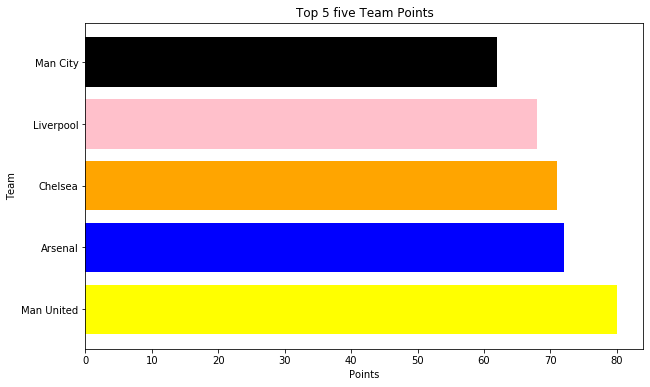

In [64]:
# Let's see the Top 5 team points
plt.figure(figsize=(10,6))
plt.barh(df2.head().index,df2['points'].head(),color=['yellow','blue','orange','pink','black'])
plt.title("Top 5 five Team Points")
plt.xlabel("Points")
plt.ylabel("Team")

## Number of match won by Top 5 team

Text(0, 0.5, 'Team')

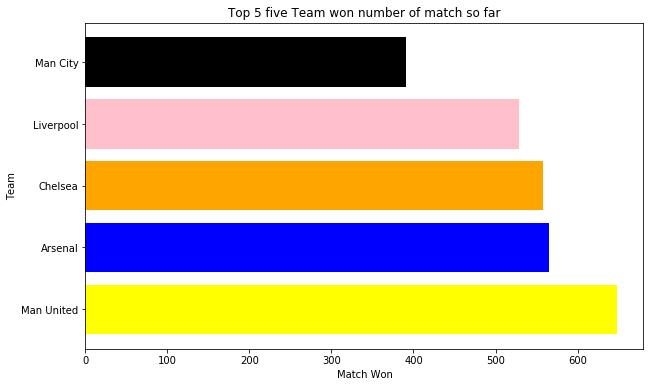

In [65]:
#Let's see the Top 5 team Won match
plt.figure(figsize=(10,6))
plt.barh(df2.head().index,df2['wins'].head(),color=['yellow','blue','orange','pink','black'])
plt.title("Top 5 five Team won number of match so far")
plt.xlabel("Match Won")
plt.ylabel("Team")


## Number of match lost by Top 5 team

Text(0, 0.5, 'Team')

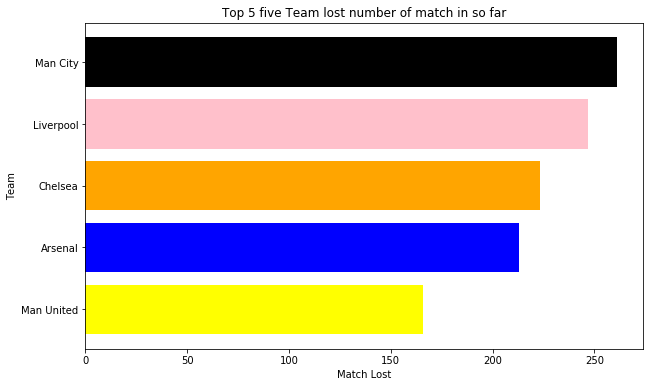

In [66]:
#Let's see the Top 5 team Lost match
plt.figure(figsize=(10,6))
plt.barh(df2.head().index,df2['lossess'].head(),color=['yellow','blue','orange','pink','black'])
plt.title("Top 5 five Team lost number of match in so far")
plt.xlabel("Match Lost")
plt.ylabel("Team")

## Number of match drawn by Top 5 team

Text(0, 0.5, 'Team')

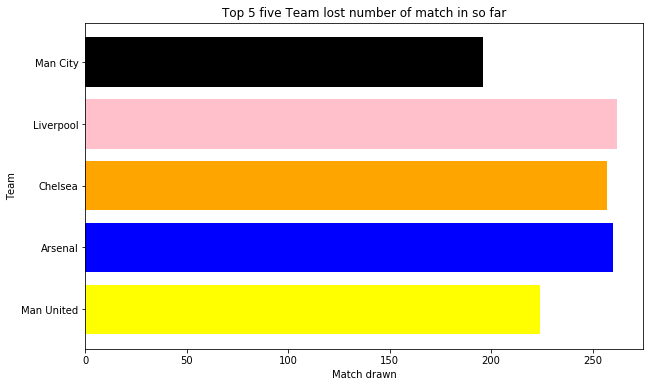

In [67]:
#Let's see the Top 5 team drawn match
plt.figure(figsize=(10,6))
plt.barh(df2.head().index,df2['drawns'].head(),color=['yellow','blue','orange','pink','black'])
plt.title("Top 5 five Team lost number of match in so far")
plt.xlabel("Match drawn")
plt.ylabel("Team")

## Number goals_for by Top 5 team

Text(0, 0.5, 'Team')

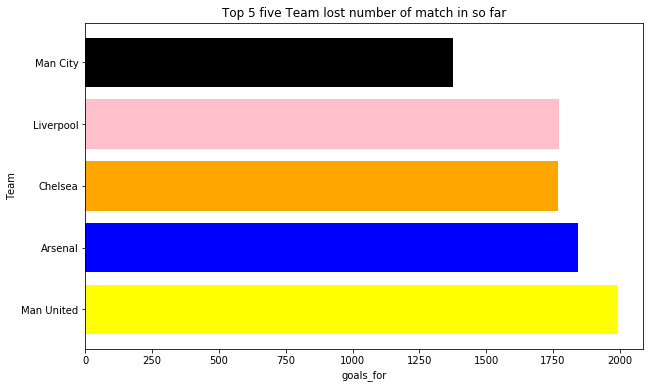

In [68]:
#Let's see the Top 5 team goals_for match
plt.figure(figsize=(10,6))
plt.barh(df2.head().index,df2['goals_for'].head(),color=['yellow','blue','orange','pink','black'])
plt.title("Top 5 five Team lost number of match in so far")
plt.xlabel("goals_for")
plt.ylabel("Team")

## Number goals_for by Top 5 team

Text(0, 0.5, 'Team')

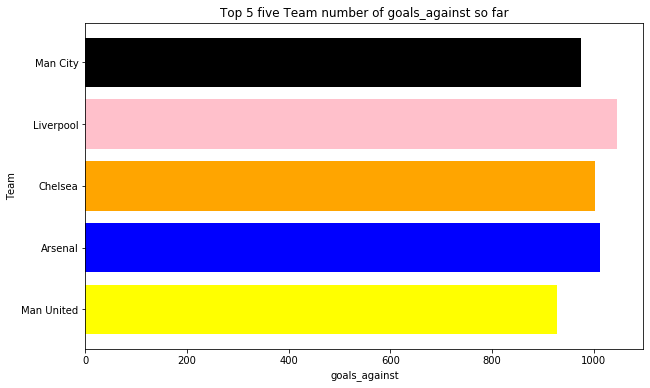

In [69]:
#Let's see the Top 5 team goals_for match
plt.figure(figsize=(10,6))
plt.barh(df2.head().index,df2['goals_against'].head(),color=['yellow','blue','orange','pink','black'])
plt.title("Top 5 five Team number of goals_against so far")
plt.xlabel("goals_against")
plt.ylabel("Team")

In [70]:
df2['HomeTeam'] = df2.index
df2['AwayTeam'] = df2.index

In [71]:
df2.reset_index()

,team,rank,matches_played,wins,drawns,goals_for,goals_against,goals_diff,points,lossess,HomeTeam,AwayTeam
0,Man United,1,1038,648,224,1989,929,39,80,166,Man United,Man United
1,Arsenal,2,1038,565,260,1845,1013,30,72,213,Arsenal,Arsenal
2,Chelsea,3,1038,558,257,1770,1002,28,71,223,Chelsea,Chelsea
3,Liverpool,4,1038,529,262,1774,1046,26,68,247,Liverpool,Liverpool
4,Man City,5,848,391,196,1374,975,18,62,261,Man City,Man City
5,Tottenham,6,1038,446,257,1547,1306,8,59,335,Tottenham,Tottenham
6,Newcastle,7,920,346,234,1249,1235,0,53,340,Newcastle,Newcastle
7,Everton,8,1038,377,296,1357,1311,1,52,365,Everton,Everton
8,Aston Villa,9,924,316,275,1117,1186,-2,50,333,Aston Villa,Aston Villa
9,West Ham,10,882,290,228,1064,1269,-8,47,364,West Ham,West Ham


In [72]:
Match_origin = pd.merge(Match_origin,df2,on=['HomeTeam'])

In [73]:
Match_origin = Match_origin.rename(columns={'AwayTeam_x':'AwayTeam'})

In [74]:
Match_origin

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,Name,Jersey Number,Position,Nationality,Age,Appearances,Wins,Losses,Goals,Goals per match,Headed goals,Goals with right foot,Goals with left foot,Penalties scored,Freekicks scored,Shots,Shots on target,Shooting accuracy %,...,Duels lost,Successful 50/50s,Aerial battles won,Aerial battles lost,Own goals,Errors leading to goal,Assists,Passes,Passes per match,Big chances created,Crosses,Cross accuracy %,Through balls,Accurate long balls,Saves,Penalties saved,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides,Defender,Forward,Midfielder,Goalkeeper,rank,matches_played,wins,drawns,goals_for,goals_against,goals_diff,points,lossess,AwayTeam_y
0,2009-08-15 00:00:00,Everton,Arsenal,1,6,A,0,3,A,M Halsey,8,15,5,9,11,13,4,9,0,0,0,0,Jordan Pickford,1.0,Goalkeeper,England,26.0,147,48,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,13.0,0,4553,30.97,NaN,NaN,NaN,NaN,1273.0,462.0,4.0,71.0,98.0,38.0,65.0,609.0,1232.0,3,0,3,NaN,0,0,0,Jordan Pickford,8,1038,377,296,1357,1311,1,52,365,Everton
1,2009-08-15 00:00:00,Everton,Arsenal,1,6,A,0,3,A,M Halsey,8,15,5,9,11,13,4,9,0,0,0,0,João Virgínia,31.0,Goalkeeper,Portugal,20.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0,0,0.00,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN,0,0,0,João Virgínia,8,1038,377,296,1357,1311,1,52,365,Everton
2,2009-08-15 00:00:00,Everton,Arsenal,1,6,A,0,3,A,M Halsey,8,15,5,9,11,13,4,9,0,0,0,0,Jonas Lössl,49.0,Goalkeeper,Denmark,31.0,69,12,41,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,5.0,2,2290,33.19,NaN,NaN,NaN,NaN,746.0,191.0,3.0,43.0,49.0,9.0,34.0,200.0,527.0,2,0,0,NaN,0,0,0,Jonas Lössl,8,1038,377,296,1357,1311,1,52,365,Everton
3,2009-08-15 00:00:00,Everton,Arsenal,1,6,A,0,3,A,M Halsey,8,15,5,9,11,13,4,9,0,0,0,0,Mason Holgate,4.0,Defender,England,23.0,65,28,16,0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,227.0,27.0,124.0,120.0,0.0,1.0,4,2429,37.37,7.0,62.0,16%,2.0,218.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,0,43,3.0,Mason Holgate,0,0,0,8,1038,377,296,1357,1311,1,52,365,Everton
4,2009-08-15 00:00:00,Everton,Arsenal,1,6,A,0,3,A,M Halsey,8,15,5,9,11,13,4,9,0,0,0,0,Michael Keane,5.0,Defender,England,27.0,153,53,64,6,NaN,3.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,...,574.0,22.0,685.0,417.0,1.0,1.0,5,6162,40.27,7.0,11.0,27%,3.0,479.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,0,82,5.0,Michael Keane,0,0,0,8,1038,377,296,1357,1311,1,52,365,Everton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50959,2019-05-12 00:00:00,Brighton,Man City,1,4,A,1,2,A,M Oliver,6,20,2,9,12,8,2,6,0,0,0,0,Alireza Jahanbakhsh,16.0,Forward,Iran,27.0,31,8,16,2,0.06,0.0,2.0,0.0,0.0,0.0,34.0,8.0,24%,...,NaN,NaN,NaN,NaN,NaN,NaN,0,401,12.94,2.0,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0,21,7.0,0,Alireza Jahanbakhsh,0,0,16,76,18,22,69,114,-22,38,36,Brighton
50960,2019-05-12 00:00:00,Brighton,Man City,1,4,A,1,2,A,M Oliver,6,20,2,9,12,8,2,6,0,0,0,0,José Izquierdo,19.0,Forward,Colombia,28.0,47,13,19,5,0.11,0.0,5.0,0.0,0.0,0.0,67.0,19.0,28%,...,NaN,NaN,NaN,NaN,NaN,NaN,4,728,15.49,4.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0,26,18.0,0,José Izquierdo,0,0,16,76,18,22,69,114,-22,38,36,Brighton
50961,2019-05-12 00:00:00,Brighton,Man City,1,4,A,1,2,A,M Oliver,6,20,2,9,12,8,2,6,0,0,0,0,Aaron Connolly,7.0,Forward,Ireland,20.0,26,8,12,4,0.15,0.0,4.0,0.0,0.0,0.0,43.0,16.0,37%,...,NaN,NaN,NaN,NaN,NaN,NaN,1,161,6.19,1.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,17,16.0,0,Aaron Connolly,0,0,16,76,18,22,69,114,-22,38,36,Brighton
50962,2019-05-12 00:00:00,Brighton,Man City,1,4,A,1,2,A,M Oliver,6,20,2,9,12,8,2,6,0,0,0,0,F

In [75]:
Match_origin = pd.merge(Match_origin,df2,on=['AwayTeam'])

In [76]:
Match_origin

,Date,HomeTeam_x,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,Name,Jersey Number,Position,Nationality,Age,Appearances,Wins,Losses,Goals,Goals per match,Headed goals,Goals with right foot,Goals with left foot,Penalties scored,Freekicks scored,Shots,Shots on target,Shooting accuracy %,...,Crosses,Cross accuracy %,Through balls,Accurate long balls,Saves,Penalties saved,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides,Defender,Forward,Midfielder,Goalkeeper,rank_x,matches_played_x,wins_x,drawns_x,goals_for_x,goals_against_x,goals_diff_x,points_x,lossess_x,AwayTeam_y,rank_y,matches_played_y,wins_y,drawns_y,goals_for_y,goals_against_y,goals_diff_y,points_y,lossess_y,HomeTeam_y
0,2009-08-15 00:00:00,Everton,Arsenal,1,6,A,0,3,A,M Halsey,8,15,5,9,11,13,4,9,0,0,0,0,Jordan Pickford,1.0,Goalkeeper,England,26.0,147,48,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1273.0,462.0,4.0,71.0,98.0,38.0,65.0,609.0,1232.0,3,0,3,NaN,0,0,0,Jordan Pickford,8,1038,377,296,1357,1311,1,52,365,Everton,2,1038,565,260,1845,1013,30,72,213,Arsenal
1,2009-08-15 00:00:00,Everton,Arsenal,1,6,A,0,3,A,M Halsey,8,15,5,9,11,13,4,9,0,0,0,0,João Virgínia,31.0,Goalkeeper,Portugal,20.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN,0,0,0,João Virgínia,8,1038,377,296,1357,1311,1,52,365,Everton,2,1038,565,260,1845,1013,30,72,213,Arsenal
2,2009-08-15 00:00:00,Everton,Arsenal,1,6,A,0,3,A,M Halsey,8,15,5,9,11,13,4,9,0,0,0,0,Jonas Lössl,49.0,Goalkeeper,Denmark,31.0,69,12,41,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,746.0,191.0,3.0,43.0,49.0,9.0,34.0,200.0,527.0,2,0,0,NaN,0,0,0,Jonas Lössl,8,1038,377,296,1357,1311,1,52,365,Everton,2,1038,565,260,1845,1013,30,72,213,Arsenal
3,2009-08-15 00:00:00,Everton,Arsenal,1,6,A,0,3,A,M Halsey,8,15,5,9,11,13,4,9,0,0,0,0,Mason Holgate,4.0,Defender,England,23.0,65,28,16,0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,62.0,16%,2.0,218.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,0,43,3.0,Mason Holgate,0,0,0,8,1038,377,296,1357,1311,1,52,365,Everton,2,1038,565,260,1845,1013,30,72,213,Arsenal
4,2009-08-15 00:00:00,Everton,Arsenal,1,6,A,0,3,A,M Halsey,8,15,5,9,11,13,4,9,0,0,0,0,Michael Keane,5.0,Defender,England,27.0,153,53,64,6,NaN,3.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,...,11.0,27%,3.0,479.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,0,82,5.0,Michael Keane,0,0,0,8,1038,377,296,1357,1311,1,52,365,Everton,2,1038,565,260,1845,1013,30,72,213,Arsenal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50959,2018-12-29 00:00:00,Brighton,Everton,1,0,H,0,0,D,A Madley,11,13,3,4,10,11,6,6,0,2,0,0,Alireza Jahanbakhsh,16.0,Forward,Iran,27.0,31,8,16,2,0.06,0.0,2.0,0.0,0.0,0.0,34.0,8.0,24%,...,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0,21,7.0,0,Alireza Jahanbakhsh,0,0,16,76,18,22,69,114,-22,38,36,Brighton,8,1038,377,296,1357,1311,1,52,365,Everton
50960,2018-12-29 00:00:00,Brighton,Everton,1,0,H,0,0,D,A Madley,11,13,3,4,10,11,6,6,0,2,0,0,José Izquierdo,19.0,Forward,Colombia,28.0,47,13,19,5,0.11,0.0,5.0,0.0,0.0,0.0,67.0,19.0,28%,...,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0,26,18.0,0,José Izquierdo,0,0,16,76,18,22,69,114,-22,38,36,Brighton,8,1038,377,296,1357,1311,1,52,365,Everton
50961,2018-12-29 00:00:00,Brighton,Everton,1,0,H,0,0,D,A Madley,11,13,3,4,10,11,6,6,0,2,0,0,Aaron Connolly,7.0,Forward,Ireland,20.0,26,8,12,4,0.15,0.0,4.0,0.0,0.0,0.0,43.0,16.0,37%,...,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,17,16.0,0,Aaron Connolly,0,0,16,76,18,22,69,114,-22,38,36,Brighton,8,1038,377,296,1357,1311,1,52,365,Everton
50962,2018-12-29 00:00:00,Brighton,Everton,1,0,H,0,0,D,A Madley,11,13,3,4,10,11,6,6,0,2,0,0,Florin Andone

In [77]:
Match_origin = Match_origin.rename(columns={'HomeTeam_x':'HomeTeam'})

In [78]:
Match_origin.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,Name,Jersey Number,Position,Nationality,Age,Appearances,Wins,Losses,Goals,Goals per match,Headed goals,Goals with right foot,Goals with left foot,Penalties scored,Freekicks scored,Shots,Shots on target,Shooting accuracy %,...,Crosses,Cross accuracy %,Through balls,Accurate long balls,Saves,Penalties saved,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides,Defender,Forward,Midfielder,Goalkeeper,rank_x,matches_played_x,wins_x,drawns_x,goals_for_x,goals_against_x,goals_diff_x,points_x,lossess_x,AwayTeam_y,rank_y,matches_played_y,wins_y,drawns_y,goals_for_y,goals_against_y,goals_diff_y,points_y,lossess_y,HomeTeam_y
0,2009-08-15 00:00:00,Everton,Arsenal,1,6,A,0,3,A,M Halsey,8,15,5,9,11,13,4,9,0,0,0,0,Jordan Pickford,1.0,Goalkeeper,England,26.0,147,48,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1273.0,462.0,4.0,71.0,98.0,38.0,65.0,609.0,1232.0,3,0,3,NaN,0,0,0,Jordan Pickford,8,1038,377,296,1357,1311,1,52,365,Everton,2,1038,565,260,1845,1013,30,72,213,Arsenal
1,2009-08-15 00:00:00,Everton,Arsenal,1,6,A,0,3,A,M Halsey,8,15,5,9,11,13,4,9,0,0,0,0,João Virgínia,31.0,Goalkeeper,Portugal,20.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN,0,0,0,João Virgínia,8,1038,377,296,1357,1311,1,52,365,Everton,2,1038,565,260,1845,1013,30,72,213,Arsenal
2,2009-08-15 00:00:00,Everton,Arsenal,1,6,A,0,3,A,M Halsey,8,15,5,9,11,13,4,9,0,0,0,0,Jonas Lössl,49.0,Goalkeeper,Denmark,31.0,69,12,41,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,746.0,191.0,3.0,43.0,49.0,9.0,34.0,200.0,527.0,2,0,0,NaN,0,0,0,Jonas Lössl,8,1038,377,296,1357,1311,1,52,365,Everton,2,1038,565,260,1845,1013,30,72,213,Arsenal
3,2009-08-15 00:00:00,Everton,Arsenal,1,6,A,0,3,A,M Halsey,8,15,5,9,11,13,4,9,0,0,0,0,Mason Holgate,4.0,Defender,England,23.0,65,28,16,0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,62.0,16%,2.0,218.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,0,43,3.0,Mason Holgate,0,0,0,8,1038,377,296,1357,1311,1,52,365,Everton,2,1038,565,260,1845,1013,30,72,213,Arsenal
4,2009-08-15 00:00:00,Everton,Arsenal,1,6,A,0,3,A,M Halsey,8,15,5,9,11,13,4,9,0,0,0,0,Michael Keane,5.0,Defender,England,27.0,153,53,64,6,NaN,3.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,...,11.0,27%,3.0,479.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,0,82,5.0,Michael Keane,0,0,0,8,1038,377,296,1357,1311,1,52,365,Everton,2,1038,565,260,1845,1013,30,72,213,Arsenal


In [79]:
Match_origin.columns

Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG',
       'HTR', 'Referee',
       ...
       'rank_y', 'matches_played_y', 'wins_y', 'drawns_y', 'goals_for_y',
       'goals_against_y', 'goals_diff_y', 'points_y', 'lossess_y',
       'HomeTeam_y'],
      dtype='object', length=104)

In [80]:
Match_origin = Match_origin.rename(columns={'rank_x':'rank_home',
                             'matches_played_x':'matches_played_home',
                             'wins_x':'wins_home',
                            'drawns_x':'drawns_home',
                            'goals_for_x':'goals_for_home',
                            'goals_against_x':'goals_against_home',
                            'goals_diff_x':'goals_diff_home',
                            'points_x':'points_home',
                            'lossess_x':'lossess_home'})

In [81]:
Match_origin = Match_origin.rename(columns={'rank_y':'rank_away',
                             'matches_played_y':'matches_played_away',
                             'wins_y':'wins_away',
                            'drawns_y':'drawns_away',
                            'goals_for_y':'goals_for_away',
                            'goals_against_y':'goals_against_away',
                            'goals_diff_y':'goals_diff_away',
                            'points_y':'points_away',
                            'lossess_y':'lossess_away'})

In [82]:
Match_origin.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,Name,Jersey Number,Position,Nationality,Age,Appearances,Wins,Losses,Goals,Goals per match,Headed goals,Goals with right foot,Goals with left foot,Penalties scored,Freekicks scored,Shots,Shots on target,Shooting accuracy %,...,Crosses,Cross accuracy %,Through balls,Accurate long balls,Saves,Penalties saved,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides,Defender,Forward,Midfielder,Goalkeeper,rank_home,matches_played_home,wins_home,drawns_home,goals_for_home,goals_against_home,goals_diff_home,points_home,lossess_home,AwayTeam_y,rank_away,matches_played_away,wins_away,drawns_away,goals_for_away,goals_against_away,goals_diff_away,points_away,lossess_away,HomeTeam_y
0,2009-08-15 00:00:00,Everton,Arsenal,1,6,A,0,3,A,M Halsey,8,15,5,9,11,13,4,9,0,0,0,0,Jordan Pickford,1.0,Goalkeeper,England,26.0,147,48,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1273.0,462.0,4.0,71.0,98.0,38.0,65.0,609.0,1232.0,3,0,3,NaN,0,0,0,Jordan Pickford,8,1038,377,296,1357,1311,1,52,365,Everton,2,1038,565,260,1845,1013,30,72,213,Arsenal
1,2009-08-15 00:00:00,Everton,Arsenal,1,6,A,0,3,A,M Halsey,8,15,5,9,11,13,4,9,0,0,0,0,João Virgínia,31.0,Goalkeeper,Portugal,20.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN,0,0,0,João Virgínia,8,1038,377,296,1357,1311,1,52,365,Everton,2,1038,565,260,1845,1013,30,72,213,Arsenal
2,2009-08-15 00:00:00,Everton,Arsenal,1,6,A,0,3,A,M Halsey,8,15,5,9,11,13,4,9,0,0,0,0,Jonas Lössl,49.0,Goalkeeper,Denmark,31.0,69,12,41,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,746.0,191.0,3.0,43.0,49.0,9.0,34.0,200.0,527.0,2,0,0,NaN,0,0,0,Jonas Lössl,8,1038,377,296,1357,1311,1,52,365,Everton,2,1038,565,260,1845,1013,30,72,213,Arsenal
3,2009-08-15 00:00:00,Everton,Arsenal,1,6,A,0,3,A,M Halsey,8,15,5,9,11,13,4,9,0,0,0,0,Mason Holgate,4.0,Defender,England,23.0,65,28,16,0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,62.0,16%,2.0,218.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,0,43,3.0,Mason Holgate,0,0,0,8,1038,377,296,1357,1311,1,52,365,Everton,2,1038,565,260,1845,1013,30,72,213,Arsenal
4,2009-08-15 00:00:00,Everton,Arsenal,1,6,A,0,3,A,M Halsey,8,15,5,9,11,13,4,9,0,0,0,0,Michael Keane,5.0,Defender,England,27.0,153,53,64,6,NaN,3.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,...,11.0,27%,3.0,479.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,0,82,5.0,Michael Keane,0,0,0,8,1038,377,296,1357,1311,1,52,365,Everton,2,1038,565,260,1845,1013,30,72,213,Arsenal


In [83]:
pd.set_option("display.max_columns",False)

In [84]:
Match_origin.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,Name,Jersey Number,Position,Nationality,Age,Appearances,Wins,Losses,Goals,Goals per match,Headed goals,Goals with right foot,Goals with left foot,Penalties scored,Freekicks scored,Shots,Shots on target,Shooting accuracy %,...,Crosses,Cross accuracy %,Through balls,Accurate long balls,Saves,Penalties saved,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides,Defender,Forward,Midfielder,Goalkeeper,rank_home,matches_played_home,wins_home,drawns_home,goals_for_home,goals_against_home,goals_diff_home,points_home,lossess_home,AwayTeam_y,rank_away,matches_played_away,wins_away,drawns_away,goals_for_away,goals_against_away,goals_diff_away,points_away,lossess_away,HomeTeam_y
0,2009-08-15 00:00:00,Everton,Arsenal,1,6,A,0,3,A,M Halsey,8,15,5,9,11,13,4,9,0,0,0,0,Jordan Pickford,1.0,Goalkeeper,England,26.0,147,48,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1273.0,462.0,4.0,71.0,98.0,38.0,65.0,609.0,1232.0,3,0,3,NaN,0,0,0,Jordan Pickford,8,1038,377,296,1357,1311,1,52,365,Everton,2,1038,565,260,1845,1013,30,72,213,Arsenal
1,2009-08-15 00:00:00,Everton,Arsenal,1,6,A,0,3,A,M Halsey,8,15,5,9,11,13,4,9,0,0,0,0,João Virgínia,31.0,Goalkeeper,Portugal,20.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN,0,0,0,João Virgínia,8,1038,377,296,1357,1311,1,52,365,Everton,2,1038,565,260,1845,1013,30,72,213,Arsenal
2,2009-08-15 00:00:00,Everton,Arsenal,1,6,A,0,3,A,M Halsey,8,15,5,9,11,13,4,9,0,0,0,0,Jonas Lössl,49.0,Goalkeeper,Denmark,31.0,69,12,41,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,746.0,191.0,3.0,43.0,49.0,9.0,34.0,200.0,527.0,2,0,0,NaN,0,0,0,Jonas Lössl,8,1038,377,296,1357,1311,1,52,365,Everton,2,1038,565,260,1845,1013,30,72,213,Arsenal
3,2009-08-15 00:00:00,Everton,Arsenal,1,6,A,0,3,A,M Halsey,8,15,5,9,11,13,4,9,0,0,0,0,Mason Holgate,4.0,Defender,England,23.0,65,28,16,0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,62.0,16%,2.0,218.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,0,43,3.0,Mason Holgate,0,0,0,8,1038,377,296,1357,1311,1,52,365,Everton,2,1038,565,260,1845,1013,30,72,213,Arsenal
4,2009-08-15 00:00:00,Everton,Arsenal,1,6,A,0,3,A,M Halsey,8,15,5,9,11,13,4,9,0,0,0,0,Michael Keane,5.0,Defender,England,27.0,153,53,64,6,NaN,3.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,...,11.0,27%,3.0,479.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,0,82,5.0,Michael Keane,0,0,0,8,1038,377,296,1357,1311,1,52,365,Everton,2,1038,565,260,1845,1013,30,72,213,Arsenal


In [85]:
df1.head()

,Name,Jersey Number,HomeTeam,Position,Nationality,Age,Appearances,Wins,Losses,Goals,Goals per match,Headed goals,Goals with right foot,Goals with left foot,Penalties scored,Freekicks scored,Shots,Shots on target,Shooting accuracy %,Hit woodwork,Big chances missed,Clean sheets,Goals conceded,Tackles,Tackle success %,Last man tackles,Blocked shots,Interceptions,Clearances,Headed Clearance,Clearances off line,Recoveries,Duels won,Duels lost,Successful 50/50s,Aerial battles won,Aerial battles lost,Own goals,Errors leading to goal,Assists,Passes,Passes per match,Big chances created,Crosses,Cross accuracy %,Through balls,Accurate long balls,Saves,Penalties saved,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides,Defender,Forward,Midfielder,Goalkeeper
0,Bernd Leno,1.0,Arsenal,Goalkeeper,Germany,28.0,64,28,16,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,7.0,0,1783,27.86,NaN,NaN,NaN,NaN,234.0,222.0,1.0,34.0,26.0,17.0,28.0,375.0,489.0,2,0,0,NaN,0,0,0,Bernd Leno
1,Matt Macey,33.0,Arsenal,Goalkeeper,England,26.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,0.00,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN,0,0,0,Matt Macey
2,Rúnar Alex Rúnarsson,13.0,Arsenal,Goalkeeper,Iceland,25.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,0.00,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN,0,0,0,Rúnar Alex Rúnarsson
3,Héctor Bellerín,2.0,Arsenal,Defender,Spain,25.0,160,90,37,7,NaN,0.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,53.0,166.0,214.0,78%,1.0,32.0,208.0,304.0,143.0,3.0,732.0,611.0,709.0,196.0,161.0,215.0,1.0,1.0,18,7125,44.53,28.0,389.0,16%,31.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,0,125,8.0,Héctor Bellerín,0,0,0
4,Kieran Tierney,3.0,Arsenal,Defender,Scotland,23.0,16,7,5,1,NaN,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2.0,16.0,21.0,81%,0.0,1.0,12.0,32.0,12.0,0.0,63.0,55.0,38.0,12.0,10.0,16.0,0.0,0.0,1,519,32.44,1.0,45.0,18%,0.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0,9,0.0,Kieran Tierney,0,0,0


In [86]:
df1.rename(columns={'HomeTeam':'AwayTeam'},inplace=True)

In [87]:
Match_origin = pd.merge(Match_origin,df1, on=['AwayTeam'])

In [88]:
Match_origin.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,Name_x,Jersey Number_x,Position_x,Nationality_x,Age_x,Appearances_x,Wins_x,Losses_x,Goals_x,Goals per match_x,Headed goals_x,Goals with right foot_x,Goals with left foot_x,Penalties scored_x,Freekicks scored_x,Shots_x,Shots on target_x,Shooting accuracy %_x,...,Tackles_y,Tackle success %_y,Last man tackles_y,Blocked shots_y,Interceptions_y,Clearances_y,Headed Clearance_y,Clearances off line_y,Recoveries_y,Duels won_y,Duels lost_y,Successful 50/50s_y,Aerial battles won_y,Aerial battles lost_y,Own goals_y,Errors leading to goal_y,Assists_y,Passes_y,Passes per match_y,Big chances created_y,Crosses_y,Cross accuracy %_y,Through balls_y,Accurate long balls_y,Saves_y,Penalties saved_y,Punches_y,High Claims_y,Catches_y,Sweeper clearances_y,Throw outs_y,Goal Kicks_y,Yellow cards_y,Red cards_y,Fouls_y,Offsides_y,Defender_y,Forward_y,Midfielder_y,Goalkeeper_y
0,2009-08-15 00:00:00,Everton,Arsenal,1,6,A,0,3,A,M Halsey,8,15,5,9,11,13,4,9,0,0,0,0,Jordan Pickford,1.0,Goalkeeper,England,26.0,147,48,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,7.0,0,1783,27.86,NaN,NaN,NaN,NaN,234.0,222.0,1.0,34.0,26.0,17.0,28.0,375.0,489.0,2,0,0,NaN,0,0,0,Bernd Leno
1,2009-08-15 00:00:00,Everton,Arsenal,1,6,A,0,3,A,M Halsey,8,15,5,9,11,13,4,9,0,0,0,0,Jordan Pickford,1.0,Goalkeeper,England,26.0,147,48,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,0.00,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN,0,0,0,Matt Macey
2,2009-08-15 00:00:00,Everton,Arsenal,1,6,A,0,3,A,M Halsey,8,15,5,9,11,13,4,9,0,0,0,0,Jordan Pickford,1.0,Goalkeeper,England,26.0,147,48,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,0.00,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN,0,0,0,Rúnar Alex Rúnarsson
3,2009-08-15 00:00:00,Everton,Arsenal,1,6,A,0,3,A,M Halsey,8,15,5,9,11,13,4,9,0,0,0,0,Jordan Pickford,1.0,Goalkeeper,England,26.0,147,48,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,214.0,78%,1.0,32.0,208.0,304.0,143.0,3.0,732.0,611.0,709.0,196.0,161.0,215.0,1.0,1.0,18,7125,44.53,28.0,389.0,16%,31.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,0,125,8.0,Héctor Bellerín,0,0,0
4,2009-08-15 00:00:00,Everton,Arsenal,1,6,A,0,3,A,M Halsey,8,15,5,9,11,13,4,9,0,0,0,0,Jordan Pickford,1.0,Goalkeeper,England,26.0,147,48,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21.0,81%,0.0,1.0,12.0,32.0,12.0,0.0,63.0,55.0,38.0,12.0,10.0,16.0,0.0,0.0,1,519,32.44,1.0,45.0,18%,0.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0,9,0.0,Kieran Tierney,0,0,0


In [89]:
Match_origin = Match_origin.fillna(0)

In [90]:
Match_origin.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,Name_x,Jersey Number_x,Position_x,Nationality_x,Age_x,Appearances_x,Wins_x,Losses_x,Goals_x,Goals per match_x,Headed goals_x,Goals with right foot_x,Goals with left foot_x,Penalties scored_x,Freekicks scored_x,Shots_x,Shots on target_x,Shooting accuracy %_x,...,Tackles_y,Tackle success %_y,Last man tackles_y,Blocked shots_y,Interceptions_y,Clearances_y,Headed Clearance_y,Clearances off line_y,Recoveries_y,Duels won_y,Duels lost_y,Successful 50/50s_y,Aerial battles won_y,Aerial battles lost_y,Own goals_y,Errors leading to goal_y,Assists_y,Passes_y,Passes per match_y,Big chances created_y,Crosses_y,Cross accuracy %_y,Through balls_y,Accurate long balls_y,Saves_y,Penalties saved_y,Punches_y,High Claims_y,Catches_y,Sweeper clearances_y,Throw outs_y,Goal Kicks_y,Yellow cards_y,Red cards_y,Fouls_y,Offsides_y,Defender_y,Forward_y,Midfielder_y,Goalkeeper_y
0,2009-08-15 00:00:00,Everton,Arsenal,1,6,A,0,3,A,M Halsey,8,15,5,9,11,13,4,9,0,0,0,0,Jordan Pickford,1.0,Goalkeeper,England,26.0,147,48,65,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0,1783,27.86,0.0,0.0,0,0.0,234.0,222.0,1.0,34.0,26.0,17.0,28.0,375.0,489.0,2,0,0,0.0,0,0,0,Bernd Leno
1,2009-08-15 00:00:00,Everton,Arsenal,1,6,A,0,3,A,M Halsey,8,15,5,9,11,13,4,9,0,0,0,0,Jordan Pickford,1.0,Goalkeeper,England,26.0,147,48,65,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.00,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,Matt Macey
2,2009-08-15 00:00:00,Everton,Arsenal,1,6,A,0,3,A,M Halsey,8,15,5,9,11,13,4,9,0,0,0,0,Jordan Pickford,1.0,Goalkeeper,England,26.0,147,48,65,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.00,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,Rúnar Alex Rúnarsson
3,2009-08-15 00:00:00,Everton,Arsenal,1,6,A,0,3,A,M Halsey,8,15,5,9,11,13,4,9,0,0,0,0,Jordan Pickford,1.0,Goalkeeper,England,26.0,147,48,65,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,214.0,78%,1.0,32.0,208.0,304.0,143.0,3.0,732.0,611.0,709.0,196.0,161.0,215.0,1.0,1.0,18,7125,44.53,28.0,389.0,16%,31.0,144.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23,0,125,8.0,Héctor Bellerín,0,0,0
4,2009-08-15 00:00:00,Everton,Arsenal,1,6,A,0,3,A,M Halsey,8,15,5,9,11,13,4,9,0,0,0,0,Jordan Pickford,1.0,Goalkeeper,England,26.0,147,48,65,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,21.0,81%,0.0,1.0,12.0,32.0,12.0,0.0,63.0,55.0,38.0,12.0,10.0,16.0,0.0,0.0,1,519,32.44,1.0,45.0,18%,0.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0,9,0.0,Kieran Tierney,0,0,0


In [91]:
Match_origin.drop(['Referee','Jersey Number_x','Nationality_x','Age_x', 'Appearances_x','Headed goals_x',
       'Goals with right foot_x', 'Goals with left foot_x','Freekicks scored_x', 'Shots_x','Shots on target_x',
        'Hit woodwork_x','Big chances missed_x', 'Clean sheets_x', 'Goals conceded_x','Tackles_x', 'Tackle success %_x',
        'Last man tackles_x','Blocked shots_x', 'Interceptions_x', 'Clearances_x','Headed Clearance_x', 'Clearances off line_x', 
        'Recoveries_x','Duels won_x', 'Duels lost_x', 'Successful 50/50s_x','Aerial battles won_x', 'Aerial battles lost_x',
        'Errors leading to goal_x', 'Assists_x', 'Passes_x','Passes per match_x', 'Big chances created_x', 'Crosses_x',
        'Cross accuracy %_x', 'Through balls_x', 'Accurate long balls_x','Saves_x', 'Penalties saved_x', 'Punches_x', 
        'High Claims_x','Catches_x', 'Sweeper clearances_x', 'Throw outs_x', 'Goal Kicks_x','Offsides_x','AwayTeam_y',
         'HomeTeam_y','Jersey Number_y','Nationality_y','Age_y', 'Appearances_y','Headed goals_y',
       'Goals with right foot_y', 'Goals with left foot_y','Freekicks scored_y', 'Shots_y','Shots on target_y',
        'Hit woodwork_y','Big chances missed_y', 'Clean sheets_y', 'Goals conceded_y','Tackles_y', 'Tackle success %_y',
        'Last man tackles_y','Blocked shots_y', 'Interceptions_y', 'Clearances_y','Headed Clearance_y', 'Clearances off line_y', 
        'Recoveries_y','Duels won_y', 'Duels lost_y', 'Successful 50/50s_y','Aerial battles won_y', 'Aerial battles lost_y',
        'Errors leading to goal_y', 'Assists_y', 'Passes_y','Passes per match_y', 'Big chances created_y', 'Crosses_y',
        'Cross accuracy %_y', 'Through balls_y', 'Accurate long balls_y','Saves_y', 'Penalties saved_y', 'Punches_y', 
        'High Claims_y','Catches_y', 'Sweeper clearances_y', 'Throw outs_y', 'Goal Kicks_y','Offsides_y'],axis=1,inplace=True)


In [92]:
Match_origin.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,Name_x,Position_x,Wins_x,Losses_x,Goals_x,Goals per match_x,Penalties scored_x,Shooting accuracy %_x,Own goals_x,Yellow cards_x,Red cards_x,Fouls_x,Defender_x,Forward_x,Midfielder_x,Goalkeeper_x,rank_home,matches_played_home,wins_home,drawns_home,goals_for_home,goals_against_home,goals_diff_home,points_home,lossess_home,rank_away,matches_played_away,wins_away,drawns_away,goals_for_away,goals_against_away,goals_diff_away,points_away,lossess_away,Name_y,Position_y,Wins_y,Losses_y,Goals_y,Goals per match_y,Penalties scored_y,Shooting accuracy %_y,Own goals_y,Yellow cards_y,Red cards_y,Fouls_y,Defender_y,Forward_y,Midfielder_y,Goalkeeper_y
0,2009-08-15 00:00:00,Everton,Arsenal,1,6,A,0,3,A,8,15,5,9,11,13,4,9,0,0,0,0,Jordan Pickford,Goalkeeper,48,65,0,0.0,0.0,0,0.0,3,0,3,0,0,0,Jordan Pickford,8,1038,377,296,1357,1311,1,52,365,2,1038,565,260,1845,1013,30,72,213,Bernd Leno,Goalkeeper,28,16,0,0.0,0.0,0,0.0,2,0,0,0,0,0,Bernd Leno
1,2009-08-15 00:00:00,Everton,Arsenal,1,6,A,0,3,A,8,15,5,9,11,13,4,9,0,0,0,0,Jordan Pickford,Goalkeeper,48,65,0,0.0,0.0,0,0.0,3,0,3,0,0,0,Jordan Pickford,8,1038,377,296,1357,1311,1,52,365,2,1038,565,260,1845,1013,30,72,213,Matt Macey,Goalkeeper,0,0,0,0.0,0.0,0,0.0,0,0,0,0,0,0,Matt Macey
2,2009-08-15 00:00:00,Everton,Arsenal,1,6,A,0,3,A,8,15,5,9,11,13,4,9,0,0,0,0,Jordan Pickford,Goalkeeper,48,65,0,0.0,0.0,0,0.0,3,0,3,0,0,0,Jordan Pickford,8,1038,377,296,1357,1311,1,52,365,2,1038,565,260,1845,1013,30,72,213,Rúnar Alex Rúnarsson,Goalkeeper,0,0,0,0.0,0.0,0,0.0,0,0,0,0,0,0,Rúnar Alex Rúnarsson
3,2009-08-15 00:00:00,Everton,Arsenal,1,6,A,0,3,A,8,15,5,9,11,13,4,9,0,0,0,0,Jordan Pickford,Goalkeeper,48,65,0,0.0,0.0,0,0.0,3,0,3,0,0,0,Jordan Pickford,8,1038,377,296,1357,1311,1,52,365,2,1038,565,260,1845,1013,30,72,213,Héctor Bellerín,Defender,90,37,7,0.0,0.0,0,1.0,23,0,125,Héctor Bellerín,0,0,0
4,2009-08-15 00:00:00,Everton,Arsenal,1,6,A,0,3,A,8,15,5,9,11,13,4,9,0,0,0,0,Jordan Pickford,Goalkeeper,48,65,0,0.0,0.0,0,0.0,3,0,3,0,0,0,Jordan Pickford,8,1038,377,296,1357,1311,1,52,365,2,1038,565,260,1845,1013,30,72,213,Kieran Tierney,Defender,7,5,1,0.0,0.0,0,0.0,2,0,9,Kieran Tierney,0,0,0


In [93]:
Match_origin

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,Name_x,Position_x,Wins_x,Losses_x,Goals_x,Goals per match_x,Penalties scored_x,Shooting accuracy %_x,Own goals_x,Yellow cards_x,Red cards_x,Fouls_x,Defender_x,Forward_x,Midfielder_x,Goalkeeper_x,rank_home,matches_played_home,wins_home,drawns_home,goals_for_home,goals_against_home,goals_diff_home,points_home,lossess_home,rank_away,matches_played_away,wins_away,drawns_away,goals_for_away,goals_against_away,goals_diff_away,points_away,lossess_away,Name_y,Position_y,Wins_y,Losses_y,Goals_y,Goals per match_y,Penalties scored_y,Shooting accuracy %_y,Own goals_y,Yellow cards_y,Red cards_y,Fouls_y,Defender_y,Forward_y,Midfielder_y,Goalkeeper_y
0,2009-08-15 00:00:00,Everton,Arsenal,1,6,A,0,3,A,8,15,5,9,11,13,4,9,0,0,0,0,Jordan Pickford,Goalkeeper,48,65,0,0.0,0.0,0,0.0,3,0,3,0,0,0,Jordan Pickford,8,1038,377,296,1357,1311,1,52,365,2,1038,565,260,1845,1013,30,72,213,Bernd Leno,Goalkeeper,28,16,0,0.00,0.0,0,0.0,2,0,0,0,0,0,Bernd Leno
1,2009-08-15 00:00:00,Everton,Arsenal,1,6,A,0,3,A,8,15,5,9,11,13,4,9,0,0,0,0,Jordan Pickford,Goalkeeper,48,65,0,0.0,0.0,0,0.0,3,0,3,0,0,0,Jordan Pickford,8,1038,377,296,1357,1311,1,52,365,2,1038,565,260,1845,1013,30,72,213,Matt Macey,Goalkeeper,0,0,0,0.00,0.0,0,0.0,0,0,0,0,0,0,Matt Macey
2,2009-08-15 00:00:00,Everton,Arsenal,1,6,A,0,3,A,8,15,5,9,11,13,4,9,0,0,0,0,Jordan Pickford,Goalkeeper,48,65,0,0.0,0.0,0,0.0,3,0,3,0,0,0,Jordan Pickford,8,1038,377,296,1357,1311,1,52,365,2,1038,565,260,1845,1013,30,72,213,Rúnar Alex Rúnarsson,Goalkeeper,0,0,0,0.00,0.0,0,0.0,0,0,0,0,0,0,Rúnar Alex Rúnarsson
3,2009-08-15 00:00:00,Everton,Arsenal,1,6,A,0,3,A,8,15,5,9,11,13,4,9,0,0,0,0,Jordan Pickford,Goalkeeper,48,65,0,0.0,0.0,0,0.0,3,0,3,0,0,0,Jordan Pickford,8,1038,377,296,1357,1311,1,52,365,2,1038,565,260,1845,1013,30,72,213,Héctor Bellerín,Defender,90,37,7,0.00,0.0,0,1.0,23,0,125,Héctor Bellerín,0,0,0
4,2009-08-15 00:00:00,Everton,Arsenal,1,6,A,0,3,A,8,15,5,9,11,13,4,9,0,0,0,0,Jordan Pickford,Goalkeeper,48,65,0,0.0,0.0,0,0.0,3,0,3,0,0,0,Jordan Pickford,8,1038,377,296,1357,1311,1,52,365,2,1038,565,260,1845,1013,30,72,213,Kieran Tierney,Defender,7,5,1,0.00,0.0,0,0.0,2,0,9,Kieran Tierney,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1478109,2018-12-29 00:00:00,Brighton,Everton,1,0,H,0,0,D,11,13,3,4,10,11,6,6,0,2,0,0,Viktor Gyökeres,Forward,0,0,0,0.0,0.0,0%,0.0,0,0,0,0,Viktor Gyökeres,0,0,16,76,18,22,69,114,-22,38,36,8,1038,377,296,1357,1311,1,52,365,Cenk Tosun,Forward,14,19,10,0.20,0.0,42%,0.0,3,0,50,0,Cenk Tosun,0,0
1478110,2018-12-29 00:00:00,Brighton,Everton,1,0,H,0,0,D,11,13,3,4,10,11,6,6,0,2,0,0,Viktor Gyökeres,Forward,0,0,0,0.0,0.0,0%,0.0,0,0,0,0,Viktor Gyökeres,0,0,16,76,18,22,69,114,-22,38,36,8,1038,377,296,1357,1311,1,52,365,Alex Iwobi,Forward,59,41,12,0.10,0.0,41%,0.0,2,0,42,0,Alex Iwobi,0,0
1478111,2018-12-29 00:00:00,Brighton,Everton,1,0,H,0,0,D,11,13,3,4,10,11,6,6,0,2,0,0,Viktor Gyökeres,Forward,0,0,0,0.0,0.0,0%,0.0,0,0,0,0,Viktor Gyökeres,0,0,16,76,18,22,69,114,-22,38,36,8,1038,377,296,1357,1311,1,52,365,Bernard,Forward,23,23,4,0.07,0.0,29%,0.0,7,0,36,0,Bernard,0,0
1478112,2018-12-29 00:00:00,Brighton,Everton,1,0,H,0,0,D,11,13,3,4,10,11,6,6,0,2,0,0,Viktor Gyökeres,Forward,0,0,0,0.0,0.0,0%,0.0,0,0,0,0,Viktor Gyökeres,0,0,16,76,18,22,69,114,-22,38,36,8,1038,377,296,1357,1311,1,52,365,Moise Kean,Forward,9,13,2,0.06,0.0,42%,0.0,1,0,28,0,Moise Kean,0,0


In [94]:
New_Matches = Match_origin

In [95]:
unique_date = New_Matches['Date'].unique()
New_Matches = New_Matches[(New_Matches['Date'].isin(unique_date))]

In [96]:
New_Matches = New_Matches.drop_duplicates(['Date'])

In [97]:
New_Matches.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,Name_x,Position_x,Wins_x,Losses_x,Goals_x,Goals per match_x,Penalties scored_x,Shooting accuracy %_x,Own goals_x,Yellow cards_x,Red cards_x,Fouls_x,Defender_x,Forward_x,Midfielder_x,Goalkeeper_x,rank_home,matches_played_home,wins_home,drawns_home,goals_for_home,goals_against_home,goals_diff_home,points_home,lossess_home,rank_away,matches_played_away,wins_away,drawns_away,goals_for_away,goals_against_away,goals_diff_away,points_away,lossess_away,Name_y,Position_y,Wins_y,Losses_y,Goals_y,Goals per match_y,Penalties scored_y,Shooting accuracy %_y,Own goals_y,Yellow cards_y,Red cards_y,Fouls_y,Defender_y,Forward_y,Midfielder_y,Goalkeeper_y
0,2009-08-15 00:00:00,Everton,Arsenal,1,6,A,0,3,A,8,15,5,9,11,13,4,9,0,0,0,0,Jordan Pickford,Goalkeeper,48,65,0,0.0,0.0,0,0.0,3,0,3,0,0,0,Jordan Pickford,8,1038,377,296,1357,1311,1,52,365,2,1038,565,260,1845,1013,30,72,213,Bernd Leno,Goalkeeper,28,16,0,0.0,0.0,0,0.0,2,0,0,0,0,0,Bernd Leno
930,2010-11-14 00:00:00,Everton,Arsenal,1,2,A,0,1,A,14,13,7,8,15,14,9,2,2,2,0,0,Jordan Pickford,Goalkeeper,48,65,0,0.0,0.0,0,0.0,3,0,3,0,0,0,Jordan Pickford,8,1038,377,296,1357,1311,1,52,365,2,1038,565,260,1845,1013,30,72,213,Bernd Leno,Goalkeeper,28,16,0,0.0,0.0,0,0.0,2,0,0,0,0,0,Bernd Leno
1860,2012-03-21 00:00:00,Everton,Arsenal,0,1,A,0,1,A,7,12,2,8,11,11,4,6,2,1,0,0,Jordan Pickford,Goalkeeper,48,65,0,0.0,0.0,0,0.0,3,0,3,0,0,0,Jordan Pickford,8,1038,377,296,1357,1311,1,52,365,2,1038,565,260,1845,1013,30,72,213,Bernd Leno,Goalkeeper,28,16,0,0.0,0.0,0,0.0,2,0,0,0,0,0,Bernd Leno
2790,2012-11-28 00:00:00,Everton,Arsenal,1,1,D,1,1,D,14,12,10,9,15,9,6,6,2,1,0,0,Jordan Pickford,Goalkeeper,48,65,0,0.0,0.0,0,0.0,3,0,3,0,0,0,Jordan Pickford,8,1038,377,296,1357,1311,1,52,365,2,1038,565,260,1845,1013,30,72,213,Bernd Leno,Goalkeeper,28,16,0,0.0,0.0,0,0.0,2,0,0,0,0,0,Bernd Leno
3720,2014-04-06 00:00:00,Everton,Arsenal,3,0,H,2,0,H,14,15,8,5,6,5,3,6,1,2,0,0,Jordan Pickford,Goalkeeper,48,65,0,0.0,0.0,0,0.0,3,0,3,0,0,0,Jordan Pickford,8,1038,377,296,1357,1311,1,52,365,2,1038,565,260,1845,1013,30,72,213,Bernd Leno,Goalkeeper,28,16,0,0.0,0.0,0,0.0,2,0,0,0,0,0,Bernd Leno


In [98]:
#Match_origin = Match_origin.drop_duplicates() 

In [99]:
New_Matches.columns

Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG',
       'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY',
       'HR', 'AR', 'Name_x', 'Position_x', 'Wins_x', 'Losses_x', 'Goals_x',
       'Goals per match_x', 'Penalties scored_x', 'Shooting accuracy %_x',
       'Own goals_x', 'Yellow cards_x', 'Red cards_x', 'Fouls_x', 'Defender_x',
       'Forward_x', 'Midfielder_x', 'Goalkeeper_x', 'rank_home',
       'matches_played_home', 'wins_home', 'drawns_home', 'goals_for_home',
       'goals_against_home', 'goals_diff_home', 'points_home', 'lossess_home',
       'rank_away', 'matches_played_away', 'wins_away', 'drawns_away',
       'goals_for_away', 'goals_against_away', 'goals_diff_away',
       'points_away', 'lossess_away', 'Name_y', 'Position_y', 'Wins_y',
       'Losses_y', 'Goals_y', 'Goals per match_y', 'Penalties scored_y',
       'Shooting accuracy %_y', 'Own goals_y', 'Yellow cards_y', 'Red cards_y',
       'Fouls_y', 'Defender_y', '

In [100]:
New_Matches = New_Matches.rename(columns={'FTR':'result','Name_x':'player_Name_home','Position_x':'player_Position_home','Wins_x':'player_Wins_home',
                            'Losses_x':'player_Losses_home','Goals_x':'player_Goals_home','Goals per match_x':'player_Goals per match_home',
                            'Penalties scored_x':'player_Penalties scored_home','Shooting accuracy %_x':'player_Shooting accuracy %_home',
                             'Own goals_x':'player_Own goals_home','Yellow cards_x':'player_Yellow cards_home','Red cards_x':'player_Red cards_home',                            'Fouls_x':'player_Fouls_home',
                             'Defender_x':'Defender_home','Forward_x':'Forward_home', 'Midfielder_x':'Midfielder_home', 'Goalkeeper_x':'Goalkeeper_home',              
                            'Name_y':'player_Name_away','Position_y':'player_Position_away','Wins_y':'player_Wins_away',
                            'Losses_y':'player_Losses_away','Goals_y':'player_Goals_away','Goals per match_y':'player_Goals per match_away',
                            'Penalties scored_y':'player_Penalties scored_away','Shooting accuracy %_y':'player_Shooting accuracy %_away',
                             'Own goals_y':'player_Own goals_away','Yellow cards_y':'player_Yellow cards_away','Red cards_y':'player_Red cards_away',
                            'Fouls_y':'player_Fouls_away','Defender_y':'Defender_away', 'Forward_y':'Forward_away', 
                            'Midfielder_y':'Midfielder_away', 'Goalkeeper_y':'Goalkeeper_away'
                            })

In [101]:
New_Matches.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,result,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,player_Name_home,player_Position_home,player_Wins_home,player_Losses_home,player_Goals_home,player_Goals per match_home,player_Penalties scored_home,player_Shooting accuracy %_home,player_Own goals_home,player_Yellow cards_home,player_Red cards_home,player_Fouls_home,Defender_home,Forward_home,Midfielder_home,Goalkeeper_home,rank_home,matches_played_home,wins_home,drawns_home,goals_for_home,goals_against_home,goals_diff_home,points_home,lossess_home,rank_away,matches_played_away,wins_away,drawns_away,goals_for_away,goals_against_away,goals_diff_away,points_away,lossess_away,player_Name_away,player_Position_away,player_Wins_away,player_Losses_away,player_Goals_away,player_Goals per match_away,player_Penalties scored_away,player_Shooting accuracy %_away,player_Own goals_away,player_Yellow cards_away,player_Red cards_away,player_Fouls_away,Defender_away,Forward_away,Midfielder_away,Goalkeeper_away
0,2009-08-15 00:00:00,Everton,Arsenal,1,6,A,0,3,A,8,15,5,9,11,13,4,9,0,0,0,0,Jordan Pickford,Goalkeeper,48,65,0,0.0,0.0,0,0.0,3,0,3,0,0,0,Jordan Pickford,8,1038,377,296,1357,1311,1,52,365,2,1038,565,260,1845,1013,30,72,213,Bernd Leno,Goalkeeper,28,16,0,0.0,0.0,0,0.0,2,0,0,0,0,0,Bernd Leno
930,2010-11-14 00:00:00,Everton,Arsenal,1,2,A,0,1,A,14,13,7,8,15,14,9,2,2,2,0,0,Jordan Pickford,Goalkeeper,48,65,0,0.0,0.0,0,0.0,3,0,3,0,0,0,Jordan Pickford,8,1038,377,296,1357,1311,1,52,365,2,1038,565,260,1845,1013,30,72,213,Bernd Leno,Goalkeeper,28,16,0,0.0,0.0,0,0.0,2,0,0,0,0,0,Bernd Leno
1860,2012-03-21 00:00:00,Everton,Arsenal,0,1,A,0,1,A,7,12,2,8,11,11,4,6,2,1,0,0,Jordan Pickford,Goalkeeper,48,65,0,0.0,0.0,0,0.0,3,0,3,0,0,0,Jordan Pickford,8,1038,377,296,1357,1311,1,52,365,2,1038,565,260,1845,1013,30,72,213,Bernd Leno,Goalkeeper,28,16,0,0.0,0.0,0,0.0,2,0,0,0,0,0,Bernd Leno
2790,2012-11-28 00:00:00,Everton,Arsenal,1,1,D,1,1,D,14,12,10,9,15,9,6,6,2,1,0,0,Jordan Pickford,Goalkeeper,48,65,0,0.0,0.0,0,0.0,3,0,3,0,0,0,Jordan Pickford,8,1038,377,296,1357,1311,1,52,365,2,1038,565,260,1845,1013,30,72,213,Bernd Leno,Goalkeeper,28,16,0,0.0,0.0,0,0.0,2,0,0,0,0,0,Bernd Leno
3720,2014-04-06 00:00:00,Everton,Arsenal,3,0,H,2,0,H,14,15,8,5,6,5,3,6,1,2,0,0,Jordan Pickford,Goalkeeper,48,65,0,0.0,0.0,0,0.0,3,0,3,0,0,0,Jordan Pickford,8,1038,377,296,1357,1311,1,52,365,2,1038,565,260,1845,1013,30,72,213,Bernd Leno,Goalkeeper,28,16,0,0.0,0.0,0,0.0,2,0,0,0,0,0,Bernd Leno


In [102]:
#a = New_Matches.drop_duplicates(['HomeTeam','AwayTeam','player_Name_home','player_Name_away','player_Position_home','player_Position_away','result'])

In [103]:
#a[(a['HomeTeam']=='Brighton') & (a['AwayTeam']=='Fulham')]['result'].value_counts()

In [104]:
#b = New_Matches.drop_duplicates(['HomeTeam', 'AwayTeam'],keep='first')

In [105]:
#b[(b['HomeTeam']=='Brighton') & (b['AwayTeam']=='Fulham')]['result'].value_counts()

In [106]:
#New_Matches = New_Matches[(New_Matches['Date']>='2017-01-01 00:00:00') & (New_Matches['Date']<=New_Matches['Date'].max())]

In [107]:
New_Matches.shape

(841, 71)

In [108]:
New_Matches['Date'].min()

'2009-08-15 00:00:00'

In [109]:
New_Matches['Date'].max()

'2019-05-12 00:00:00'

In [110]:
New_Matches = New_Matches.reset_index()

In [111]:
New_Matches

,index,Date,HomeTeam,AwayTeam,FTHG,FTAG,result,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,player_Name_home,player_Position_home,player_Wins_home,player_Losses_home,player_Goals_home,player_Goals per match_home,player_Penalties scored_home,player_Shooting accuracy %_home,player_Own goals_home,player_Yellow cards_home,player_Red cards_home,player_Fouls_home,Defender_home,Forward_home,Midfielder_home,Goalkeeper_home,rank_home,matches_played_home,wins_home,drawns_home,goals_for_home,goals_against_home,goals_diff_home,points_home,lossess_home,rank_away,matches_played_away,wins_away,drawns_away,goals_for_away,goals_against_away,goals_diff_away,points_away,lossess_away,player_Name_away,player_Position_away,player_Wins_away,player_Losses_away,player_Goals_away,player_Goals per match_away,player_Penalties scored_away,player_Shooting accuracy %_away,player_Own goals_away,player_Yellow cards_away,player_Red cards_away,player_Fouls_away,Defender_away,Forward_away,Midfielder_away,Goalkeeper_away
0,0,2009-08-15 00:00:00,Everton,Arsenal,1,6,A,0,3,A,8,15,5,9,11,13,4,9,0,0,0,0,Jordan Pickford,Goalkeeper,48,65,0,0.0,0.0,0,0.0,3,0,3,0,0,0,Jordan Pickford,8,1038,377,296,1357,1311,1,52,365,2,1038,565,260,1845,1013,30,72,213,Bernd Leno,Goalkeeper,28,16,0,0.0,0.0,0,0.0,2,0,0,0,0,0,Bernd Leno
1,930,2010-11-14 00:00:00,Everton,Arsenal,1,2,A,0,1,A,14,13,7,8,15,14,9,2,2,2,0,0,Jordan Pickford,Goalkeeper,48,65,0,0.0,0.0,0,0.0,3,0,3,0,0,0,Jordan Pickford,8,1038,377,296,1357,1311,1,52,365,2,1038,565,260,1845,1013,30,72,213,Bernd Leno,Goalkeeper,28,16,0,0.0,0.0,0,0.0,2,0,0,0,0,0,Bernd Leno
2,1860,2012-03-21 00:00:00,Everton,Arsenal,0,1,A,0,1,A,7,12,2,8,11,11,4,6,2,1,0,0,Jordan Pickford,Goalkeeper,48,65,0,0.0,0.0,0,0.0,3,0,3,0,0,0,Jordan Pickford,8,1038,377,296,1357,1311,1,52,365,2,1038,565,260,1845,1013,30,72,213,Bernd Leno,Goalkeeper,28,16,0,0.0,0.0,0,0.0,2,0,0,0,0,0,Bernd Leno
3,2790,2012-11-28 00:00:00,Everton,Arsenal,1,1,D,1,1,D,14,12,10,9,15,9,6,6,2,1,0,0,Jordan Pickford,Goalkeeper,48,65,0,0.0,0.0,0,0.0,3,0,3,0,0,0,Jordan Pickford,8,1038,377,296,1357,1311,1,52,365,2,1038,565,260,1845,1013,30,72,213,Bernd Leno,Goalkeeper,28,16,0,0.0,0.0,0,0.0,2,0,0,0,0,0,Bernd Leno
4,3720,2014-04-06 00:00:00,Everton,Arsenal,3,0,H,2,0,H,14,15,8,5,6,5,3,6,1,2,0,0,Jordan Pickford,Goalkeeper,48,65,0,0.0,0.0,0,0.0,3,0,3,0,0,0,Jordan Pickford,8,1038,377,296,1357,1311,1,52,365,2,1038,565,260,1845,1013,30,72,213,Bernd Leno,Goalkeeper,28,16,0,0.0,0.0,0,0.0,2,0,0,0,0,0,Bernd Leno
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,1454213,2012-01-01 00:00:00,West Brom,Everton,0,1,A,0,0,D,10,13,2,8,10,8,2,7,0,2,0,0,Sam Johnstone,Goalkeeper,0,2,0,0.0,0.0,0,0.0,0,0,0,0,0,0,Sam Johnstone,17,456,112,128,475,696,-18,38,216,8,1038,377,296,1357,1311,1,52,365,Jordan Pickford,Goalkeeper,48,65,0,0.0,0.0,0,0.0,3,0,3,0,0,0,Jordan Pickford
837,1455949,2014-01-20 00:00:00,West Brom,Everton,1,1,D,0,1,A,14,13,6,4,16,12,4,2,3,2,0,0,Sam Johnstone,Goalkeeper,0,2,0,0.0,0.0,0,0.0,0,0,0,0,0,0,Sam Johnstone,17,456,112,128,475,696,-18,38,216,8,1038,377,296,1357,1311,1,52,365,Jordan Pickford,Goalkeeper,48,65,0,0.0,0.0,0,0.0,3,0,3,0,0,0,Jordan Pickford
838,1457685,2015-09-28 00:00:00,West Brom,Everton,2,3,A,1,0,H,9,12,4,4,9,8,6,4,0,3,0,0,Sam Johnstone,Goalkeeper,0,2,0,0.0,0.0,0,0.0,0,0,0,0,0,0,Sam Johnstone,17,456,112,128,475,696,-18,38,216,8,1038,377,296,1357,1311,1,52,365,Jordan Pickford,Goalkeeper,48,65,0,0.0,0.0,0,0.0,3,0,3,0,0,0,Jordan Pickford
839,1460289,2013-01-21 00:00:00,Southampton,Everton,0,0,D,0,0,D,14,10,11,7,14,11,10,6,2,1,0,0,Alex McCarthy,Goalkeeper,26,43,0,0.0,0.0,0,0.0,3,0,1,0,0,0,Alex McCarthy,12,772,238,214,937,1087,-7,46,320,8,1038,377,296,1357,1311,1,52,365,Jordan Pickford,Goalkeeper,48,65,0,0.0,0.0,0,0.0,3,0,3,0,0,0,Jordan Pickford


In [112]:
New_Matches.columns

Index(['index', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'result',
       'HTHG', 'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC',
       'HY', 'AY', 'HR', 'AR', 'player_Name_home', 'player_Position_home',
       'player_Wins_home', 'player_Losses_home', 'player_Goals_home',
       'player_Goals per match_home', 'player_Penalties scored_home',
       'player_Shooting accuracy %_home', 'player_Own goals_home',
       'player_Yellow cards_home', 'player_Red cards_home',
       'player_Fouls_home', 'Defender_home', 'Forward_home', 'Midfielder_home',
       'Goalkeeper_home', 'rank_home', 'matches_played_home', 'wins_home',
       'drawns_home', 'goals_for_home', 'goals_against_home',
       'goals_diff_home', 'points_home', 'lossess_home', 'rank_away',
       'matches_played_away', 'wins_away', 'drawns_away', 'goals_for_away',
       'goals_against_away', 'goals_diff_away', 'points_away', 'lossess_away',
       'player_Name_away', 'player_Position_away', 'player_Win

In [113]:
New_Matches.shape

(841, 72)

In [114]:
#temp = Match_origin.drop_duplicates(['Date','HomeTeam', 'AwayTeam'])

In [115]:
New_Matches['player_Position_home'].value_counts()

Goalkeeper    841
Name: player_Position_home, dtype: int64

In [116]:
New_Matches[(New_Matches['HomeTeam']=='Everton') & (New_Matches['AwayTeam']=='Arsenal')]['result'].value_counts()

A    5
H    3
D    2
Name: result, dtype: int64

In [117]:
#temp['numberof_winby_home_between']=0
#temp['numberof_winby_away_between']=0
#temp['numberof_match_draw_between']=0
#temp['number_of_match_play_between']=0

New_Matches['numberof_winby_home_between']=0
New_Matches['numberof_winby_away_between']=0
New_Matches['numberof_match_draw_between']=0
New_Matches['number_of_match_play_between']=0

In [118]:
#temp = temp.reset_index()

## ---------------------------------

In [119]:
New_Matches.head()

,index,Date,HomeTeam,AwayTeam,FTHG,FTAG,result,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,player_Name_home,player_Position_home,player_Wins_home,player_Losses_home,player_Goals_home,player_Goals per match_home,player_Penalties scored_home,player_Shooting accuracy %_home,player_Own goals_home,player_Yellow cards_home,player_Red cards_home,player_Fouls_home,Defender_home,Forward_home,Midfielder_home,Goalkeeper_home,rank_home,matches_played_home,wins_home,drawns_home,goals_for_home,goals_against_home,goals_diff_home,points_home,lossess_home,rank_away,matches_played_away,wins_away,drawns_away,goals_for_away,goals_against_away,goals_diff_away,points_away,lossess_away,player_Name_away,player_Position_away,player_Wins_away,player_Losses_away,player_Goals_away,player_Goals per match_away,player_Penalties scored_away,player_Shooting accuracy %_away,player_Own goals_away,player_Yellow cards_away,player_Red cards_away,player_Fouls_away,Defender_away,Forward_away,Midfielder_away,Goalkeeper_away,numberof_winby_home_between,numberof_winby_away_between,numberof_match_draw_between,number_of_match_play_between
0,0,2009-08-15 00:00:00,Everton,Arsenal,1,6,A,0,3,A,8,15,5,9,11,13,4,9,0,0,0,0,Jordan Pickford,Goalkeeper,48,65,0,0.0,0.0,0,0.0,3,0,3,0,0,0,Jordan Pickford,8,1038,377,296,1357,1311,1,52,365,2,1038,565,260,1845,1013,30,72,213,Bernd Leno,Goalkeeper,28,16,0,0.0,0.0,0,0.0,2,0,0,0,0,0,Bernd Leno,0,0,0,0
1,930,2010-11-14 00:00:00,Everton,Arsenal,1,2,A,0,1,A,14,13,7,8,15,14,9,2,2,2,0,0,Jordan Pickford,Goalkeeper,48,65,0,0.0,0.0,0,0.0,3,0,3,0,0,0,Jordan Pickford,8,1038,377,296,1357,1311,1,52,365,2,1038,565,260,1845,1013,30,72,213,Bernd Leno,Goalkeeper,28,16,0,0.0,0.0,0,0.0,2,0,0,0,0,0,Bernd Leno,0,0,0,0
2,1860,2012-03-21 00:00:00,Everton,Arsenal,0,1,A,0,1,A,7,12,2,8,11,11,4,6,2,1,0,0,Jordan Pickford,Goalkeeper,48,65,0,0.0,0.0,0,0.0,3,0,3,0,0,0,Jordan Pickford,8,1038,377,296,1357,1311,1,52,365,2,1038,565,260,1845,1013,30,72,213,Bernd Leno,Goalkeeper,28,16,0,0.0,0.0,0,0.0,2,0,0,0,0,0,Bernd Leno,0,0,0,0
3,2790,2012-11-28 00:00:00,Everton,Arsenal,1,1,D,1,1,D,14,12,10,9,15,9,6,6,2,1,0,0,Jordan Pickford,Goalkeeper,48,65,0,0.0,0.0,0,0.0,3,0,3,0,0,0,Jordan Pickford,8,1038,377,296,1357,1311,1,52,365,2,1038,565,260,1845,1013,30,72,213,Bernd Leno,Goalkeeper,28,16,0,0.0,0.0,0,0.0,2,0,0,0,0,0,Bernd Leno,0,0,0,0
4,3720,2014-04-06 00:00:00,Everton,Arsenal,3,0,H,2,0,H,14,15,8,5,6,5,3,6,1,2,0,0,Jordan Pickford,Goalkeeper,48,65,0,0.0,0.0,0,0.0,3,0,3,0,0,0,Jordan Pickford,8,1038,377,296,1357,1311,1,52,365,2,1038,565,260,1845,1013,30,72,213,Bernd Leno,Goalkeeper,28,16,0,0.0,0.0,0,0.0,2,0,0,0,0,0,Bernd Leno,0,0,0,0


In [120]:
#for team1 in temp['HomeTeam'].unique():
#    for team2 in temp['AwayTeam'].unique():
 #       last_Match_played = temp[(temp['HomeTeam']==team1) & (temp['AwayTeam']==team2)]
  #      last_numbers = last_Match_played.sort_values(by=['Date'],ascending=False)
   #    m = last_numbers['result'].value_counts()
    #    for i in indices:
     #       temp['number_of_match_play_between'][i]=last_numbers.shape[0]
      #      g=-1
       #     for f in m.keys():
        #        g+=1
         #       if f=='H':
          #          temp['numberof_winby_home_between'][i]=m[g]
           #     elif f=='A':
            #        temp['numberof_winby_away_between'][i]=m[g]
             #   else:
              #      temp['numberof_match_draw_between'][i]=m[g]

                    
for team1 in New_Matches['HomeTeam'].unique():
    for team2 in New_Matches['AwayTeam'].unique():
        last_Match_played = New_Matches[(New_Matches['HomeTeam']==team1) & (New_Matches['AwayTeam']==team2)]
        last_numbers = last_Match_played.sort_values(by=['Date'],ascending=False)
        indices = New_Matches.loc[(New_Matches['HomeTeam']==team1)&(New_Matches['AwayTeam']==team2)]['number_of_match_play_between'].keys()
        m = last_numbers['result'].value_counts()
        for i in indices:
            New_Matches['number_of_match_play_between'][i]=last_numbers.shape[0]
            g=-1
            for f in m.keys():
                g+=1
                if f=='H':
                    New_Matches['numberof_winby_home_between'][i]=m[g]
                elif f=='A':
                    New_Matches['numberof_winby_away_between'][i]=m[g]
                else:
                    New_Matches['numberof_match_draw_between'][i]=m[g]


/Users/vishalbarad/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/vishalbarad/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/vishalbarad/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/vishalbarad/opt/anaconda3/lib/python3.7

In [121]:
#temp.sample(10)
New_Matches.sample(10)
#Match_origin[(Match_origin['HomeTeam']=='Brighton') & (Match_origin['AwayTeam']=='Fulham')]['result'].value_counts()

,index,Date,HomeTeam,AwayTeam,FTHG,FTAG,result,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,player_Name_home,player_Position_home,player_Wins_home,player_Losses_home,player_Goals_home,player_Goals per match_home,player_Penalties scored_home,player_Shooting accuracy %_home,player_Own goals_home,player_Yellow cards_home,player_Red cards_home,player_Fouls_home,Defender_home,Forward_home,Midfielder_home,Goalkeeper_home,rank_home,matches_played_home,wins_home,drawns_home,goals_for_home,goals_against_home,goals_diff_home,points_home,lossess_home,rank_away,matches_played_away,wins_away,drawns_away,goals_for_away,goals_against_away,goals_diff_away,points_away,lossess_away,player_Name_away,player_Position_away,player_Wins_away,player_Losses_away,player_Goals_away,player_Goals per match_away,player_Penalties scored_away,player_Shooting accuracy %_away,player_Own goals_away,player_Yellow cards_away,player_Red cards_away,player_Fouls_away,Defender_away,Forward_away,Midfielder_away,Goalkeeper_away,numberof_winby_home_between,numberof_winby_away_between,numberof_match_draw_between,number_of_match_play_between
349,345792,2011-03-06 00:00:00,Wolves,Tottenham,3,3,D,2,2,D,13,15,4,10,10,11,7,4,0,3,0,0,Rui Patrício,Goalkeeper,31,23,0,0.0,0.0,0,0.0,0,0,0,0,0,0,Rui Patrício,18,190,48,49,203,327,-24,38,93,6,1038,446,257,1547,1306,8,59,335,Hugo Lloris,Goalkeeper,153,56,0,0.0,0.0,0,0.0,3,0,3,0,0,0,Hugo Lloris,0,0,1,1
630,780023,2011-04-19 00:00:00,Newcastle,Man United,0,0,D,0,0,D,12,18,5,8,9,10,6,7,2,2,0,0,Mark Gillespie,Goalkeeper,0,0,0,0.0,0.0,0,0.0,0,0,0,0,0,0,Mark Gillespie,7,920,346,234,1249,1235,0,53,340,1,1038,648,224,1989,929,39,80,166,David de Gea,Goalkeeper,174,66,0,0.0,0.0,0,1.0,6,0,1,0,0,0,David de Gea,1,2,2,5
592,694355,2017-01-14 00:00:00,Leicester,Chelsea,0,3,A,0,1,A,7,8,2,3,8,9,3,5,1,0,0,0,Kasper Schmeichel,Goalkeeper,91,69,0,0.0,0.0,0,1.0,11,0,0,0,0,0,Kasper Schmeichel,11,498,157,136,623,718,-7,46,205,3,1038,558,257,1770,1002,28,71,223,Kepa Arrizabalaga,Goalkeeper,39,20,0,0.0,0.0,0,0.0,2,0,0,0,0,0,Kepa Arrizabalaga,1,2,0,3
703,942679,2014-02-09 00:00:00,Man United,Fulham,2,2,D,0,1,A,31,6,9,3,3,6,10,1,0,0,0,0,David de Gea,Goalkeeper,174,66,0,0.0,0.0,0,1.0,6,0,1,0,0,0,David de Gea,1,1038,648,224,1989,929,39,80,166,13,532,157,141,604,778,-12,43,234,Marek Rodák,Goalkeeper,0,1,0,0.0,0.0,0,0.0,0,0,0,0,0,0,Marek Rodák,4,0,1,5
582,679343,2014-02-11 00:00:00,West Brom,Chelsea,1,1,D,0,1,A,12,15,1,4,9,13,5,8,3,4,0,0,Sam Johnstone,Goalkeeper,0,2,0,0.0,0.0,0,0.0,0,0,0,0,0,0,Sam Johnstone,17,456,112,128,475,696,-18,38,216,3,1038,558,257,1770,1002,28,71,223,Kepa Arrizabalaga,Goalkeeper,39,20,0,0.0,0.0,0,0.0,2,0,0,0,0,0,Kepa Arrizabalaga,1,1,1,3
435,453584,2017-04-15 00:00:00,Everton,Burnley,3,1,H,0,0,D,29,13,7,6,15,14,6,7,2,0,0,0,Jordan Pickford,Goalkeeper,48,65,0,0.0,0.0,0,0.0,3,0,3,0,0,0,Jordan Pickford,8,1038,377,296,1357,1311,1,52,365,15,190,51,44,190,297,-21,39,95,Nick Pope,Goalkeeper,28,26,0,0.0,0.0,0,0.0,4,0,1,0,0,0,Nick Pope,4,0,0,4
620,761299,2016-02-07 00:00:00,Chelsea,Man United,1,1,D,0,0,D,16,17,5,7,6,9,10,11,0,3,0,0,Kepa Arrizabalaga,Goalkeeper,39,20,0,0.0,0.0,0,0.0,2,0,0,0,0,0,Kepa Arrizabalaga,3,1038,558,257,1770,1002,28,71,223,1,1038,648,224,1989,929,39,80,166,David de Gea,Goalkeeper,174,66,0,0.0,0.0,0,1.0,6,0,1,0,0,0,David de Gea,4,0,1,5
629,777233,2017-05-07 00:00:00,Arsenal,Man United,2,0,H,0,0,D,9,10,4,4,14,10,5,9,1,0,0,0,Bernd Leno,Goalkeeper,28,16,0,0.0,0.0,0,0.0,2,0,0,0,0,0,Bernd Leno,2,1038,565,260,1845,1013,30,72,213,1,1038,648,224,1989,929,39,80,166,David de Gea,Goalkeeper,174,66,0,0.0,0.0,0,1.0,6,0,1,0,0,0,David de Gea,2,2,1,5
708,960579,2013-10-21 00:00:00,Crystal Palace,Fulham,1,4,A,1,2,A,14,9,4,6,10,13,5,7,0,1,0,0,Wayne Hennessey,Goalkeeper,47,94,0,0.0,0.0,0,1.0,4,0,1,0,0,0,Wayne Hennessey,14,388,111,96,425,564,-13,42,181,13,532,157,141,604,778,-12,43,234,Marek Rodák,Goalkeeper,0,1,0,0.0,0.0,0,0.0,0,0,0,0,0,0,Marek Rodák,0,1,0,1
59,50670,2014-12-21 00:00:00,Liverpool,Arsenal,2,2,D,1,1,D,27,7,10,3,6,14,10,6,0,3,1,

In [122]:
New_Matches['Past_5_match_won_by_home']=0
New_Matches['Past_5_match_won_by_away']=0
New_Matches['Past_5_match_drwan']=0

In [123]:
for team1 in New_Matches['HomeTeam'].unique():
    for team2 in New_Matches['AwayTeam'].unique():
        last_Match_played = New_Matches[(New_Matches['HomeTeam']==team1) & (New_Matches['AwayTeam']==team2)]
        last_numbers = last_Match_played.sort_values(by=['Date'],ascending=False).head()
        indices = New_Matches.loc[(New_Matches['HomeTeam']==team1)&(New_Matches['AwayTeam']==team2)]['number_of_match_play_between'].keys()
        m = last_numbers['result'].value_counts()
        for i in indices:
            g=-1
            for f in m.keys():
                g+=1
                if f=='H':
                    New_Matches['Past_5_match_won_by_home'][i]=m[g]
                elif f=='A':
                    New_Matches['Past_5_match_won_by_away'][i]=m[g]
                else:
                    New_Matches['Past_5_match_drwan'][i]=m[g]


/Users/vishalbarad/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Users/vishalbarad/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/vishalbarad/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_in

In [124]:
New_Matches.sample(10)

,index,Date,HomeTeam,AwayTeam,FTHG,FTAG,result,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,player_Name_home,player_Position_home,player_Wins_home,player_Losses_home,player_Goals_home,player_Goals per match_home,player_Penalties scored_home,player_Shooting accuracy %_home,player_Own goals_home,player_Yellow cards_home,player_Red cards_home,player_Fouls_home,Defender_home,Forward_home,Midfielder_home,Goalkeeper_home,rank_home,matches_played_home,wins_home,drawns_home,goals_for_home,goals_against_home,goals_diff_home,points_home,lossess_home,rank_away,matches_played_away,wins_away,drawns_away,goals_for_away,goals_against_away,goals_diff_away,points_away,lossess_away,player_Name_away,player_Position_away,player_Wins_away,player_Losses_away,player_Goals_away,player_Goals per match_away,player_Penalties scored_away,player_Shooting accuracy %_away,player_Own goals_away,player_Yellow cards_away,player_Red cards_away,player_Fouls_away,Defender_away,Forward_away,Midfielder_away,Goalkeeper_away,numberof_winby_home_between,numberof_winby_away_between,numberof_match_draw_between,number_of_match_play_between,Past_5_match_won_by_home,Past_5_match_won_by_away,Past_5_match_drwan
43,36240,2013-08-24 00:00:00,Fulham,Arsenal,1,3,A,0,2,A,16,18,7,7,10,8,1,8,2,2,0,0,Marek Rodák,Goalkeeper,0,1,0,0.0,0.0,0,0.0,0,0,0,0,0,0,Marek Rodák,13,532,157,141,604,778,-12,43,234,2,1038,565,260,1845,1013,30,72,213,Bernd Leno,Goalkeeper,28,16,0,0.0,0.0,0,0.0,2,0,0,0,0,0,Bernd Leno,1,4,1,6,1,3,1
338,329762,2017-02-27 00:00:00,Leicester,Liverpool,3,1,H,2,0,H,13,17,7,7,8,5,5,12,0,0,0,0,Kasper Schmeichel,Goalkeeper,91,69,0,0.0,0.0,0,1.0,11,0,0,0,0,0,Kasper Schmeichel,11,498,157,136,623,718,-7,46,205,4,1038,529,262,1774,1046,26,68,247,Loris Karius,Goalkeeper,17,4,0,0.0,0.0,0,0.0,1,0,2,0,0,0,Loris Karius,1,1,0,2,1,1,0
637,793539,2017-12-17 00:00:00,West Brom,Man United,1,2,A,0,2,A,12,8,5,3,14,7,6,3,1,3,0,0,Sam Johnstone,Goalkeeper,0,2,0,0.0,0.0,0,0.0,0,0,0,0,0,0,Sam Johnstone,17,456,112,128,475,696,-18,38,216,1,1038,648,224,1989,929,39,80,166,David de Gea,Goalkeeper,174,66,0,0.0,0.0,0,1.0,6,0,1,0,0,0,David de Gea,0,2,1,3,0,2,1
795,1205562,2016-09-30 00:00:00,Everton,Crystal Palace,1,1,D,1,0,H,13,10,3,2,16,11,10,9,5,4,0,0,Jordan Pickford,Goalkeeper,48,65,0,0.0,0.0,0,0.0,3,0,3,0,0,0,Jordan Pickford,8,1038,377,296,1357,1311,1,52,365,14,388,111,96,425,564,-13,42,181,Wayne Hennessey,Goalkeeper,47,94,0,0.0,0.0,0,1.0,4,0,1,0,0,0,Wayne Hennessey,1,1,2,4,1,1,2
231,201448,2013-01-19 00:00:00,West Brom,Aston Villa,2,2,D,0,2,A,25,11,9,7,8,10,8,8,3,3,0,0,Sam Johnstone,Goalkeeper,0,2,0,0.0,0.0,0,0.0,0,0,0,0,0,0,Sam Johnstone,17,456,112,128,475,696,-18,38,216,9,924,316,275,1117,1186,-2,50,333,Tom Heaton,Goalkeeper,34,55,0,0.0,0.0,0,2.0,5,0,2,0,0,0,Tom Heaton,2,0,4,6,1,0,4
280,256356,2012-12-09 00:00:00,West Ham,Liverpool,2,3,A,2,1,H,9,16,6,8,12,10,2,5,1,2,0,0,Lukasz Fabianski,Goalkeeper,91,104,0,0.0,0.0,0,0.0,4,1,6,0,0,0,Lukasz Fabianski,10,882,290,228,1064,1269,-8,47,364,4,1038,529,262,1774,1046,26,68,247,Loris Karius,Goalkeeper,17,4,0,0.0,0.0,0,0.0,1,0,2,0,0,0,Loris Karius,2,4,1,7,1,3,1
567,653018,2014-10-26 00:00:00,Man United,Chelsea,1,1,D,0,0,D,19,9,7,4,13,14,4,7,3,5,0,1,David de Gea,Goalkeeper,174,66,0,0.0,0.0,0,1.0,6,0,1,0,0,0,David de Gea,1,1038,648,224,1989,929,39,80,166,3,1038,558,257,1770,1002,28,71,223,Kepa Arrizabalaga,Goalkeeper,39,20,0,0.0,0.0,0,0.0,2,0,0,0,0,0,Kepa Arrizabalaga,1,1,3,5,1,1,3
162,136554,2012-02-25 00:00:00,Newcastle,Wolves,2,2,D,2,0,H,13,7,8,6,8,8,3,3,1,1,0,0,Mark Gillespie,Goalkeeper,0,0,0,0.0,0.0,0,0.0,0,0,0,0,0,0,Mark Gillespie,7,920,346,234,1249,1235,0,53,340,18,190,48,49,203,327,-24,38,93,Rui Patrício,Goalkeeper,31,23,0,0.0,0.0,0,0.0,0,0,0,0,0,0,Rui Patrício,1,1,1,3,1,1,1
737,1032729,2019-04-01 00:00:00,Arsenal,Newcastle,2,0,H,1,0,H,7,3,4,1,11,10,6,2,2,0,0,0,Bernd Leno,Goalkeeper,28,16,0,0.0,0.0,0,0.0,2,0,0,0,0,0,Bernd Leno,2,1038,565,260,1845,1013,30,72,213,7,920,346,234,1249,1235,0,53,340,Mark Gillespie,Goalkeeper,0,0,0,0.0,0.0,0,0.0,0,0,0

In [125]:
#Match_origin=Match_origin.merge(temp,on=['HomeTeam','AwayTeam'])

In [126]:
#Match_origin.head()

In [127]:
#Match_origin = Match_origin[(Match_origin['Date_x']>='2015-01-18 00:00:00') & (Match_origin['Date_x']<=Match_origin['Date_x'].max())]


In [128]:
New_Matches.columns

Index(['index', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'result',
       'HTHG', 'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC',
       'HY', 'AY', 'HR', 'AR', 'player_Name_home', 'player_Position_home',
       'player_Wins_home', 'player_Losses_home', 'player_Goals_home',
       'player_Goals per match_home', 'player_Penalties scored_home',
       'player_Shooting accuracy %_home', 'player_Own goals_home',
       'player_Yellow cards_home', 'player_Red cards_home',
       'player_Fouls_home', 'Defender_home', 'Forward_home', 'Midfielder_home',
       'Goalkeeper_home', 'rank_home', 'matches_played_home', 'wins_home',
       'drawns_home', 'goals_for_home', 'goals_against_home',
       'goals_diff_home', 'points_home', 'lossess_home', 'rank_away',
       'matches_played_away', 'wins_away', 'drawns_away', 'goals_for_away',
       'goals_against_away', 'goals_diff_away', 'points_away', 'lossess_away',
       'player_Name_away', 'player_Position_away', 'player_Win

In [129]:
New_Matches.drop(['index', 'Date','Midfielder_away','Goalkeeper_away','Midfielder_home',
       'Goalkeeper_home','Defender_home','Defender_away'],axis=1,inplace=True)

In [130]:
New_Matches.columns

Index(['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'result', 'HTHG', 'HTAG', 'HTR',
       'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR',
       'AR', 'player_Name_home', 'player_Position_home', 'player_Wins_home',
       'player_Losses_home', 'player_Goals_home',
       'player_Goals per match_home', 'player_Penalties scored_home',
       'player_Shooting accuracy %_home', 'player_Own goals_home',
       'player_Yellow cards_home', 'player_Red cards_home',
       'player_Fouls_home', 'Forward_home', 'rank_home', 'matches_played_home',
       'wins_home', 'drawns_home', 'goals_for_home', 'goals_against_home',
       'goals_diff_home', 'points_home', 'lossess_home', 'rank_away',
       'matches_played_away', 'wins_away', 'drawns_away', 'goals_for_away',
       'goals_against_away', 'goals_diff_away', 'points_away', 'lossess_away',
       'player_Name_away', 'player_Position_away', 'player_Wins_away',
       'player_Losses_away', 'player_Goals_away',
       'player_Goals

In [132]:
#New_Matches['player_Shooting accuracy %_home'] = New_Matches['player_Shooting accuracy %_home'].str.rstrip("%")

In [135]:
#New_Matches['player_Shooting accuracy %_home'].unique()

In [136]:
#New_Matches['player_Shooting accuracy %_away'] = New_Matches['player_Shooting accuracy %_away'].str.rstrip("%")

In [137]:
#New_Matches['player_Shooting accuracy %_away'].unique()

In [138]:
#New_Matches.isnull().sum().sum()

In [139]:
#New_Matches.columns

In [140]:
for i in (New_Matches.select_dtypes(['float64']).columns):
    New_Matches[i] = New_Matches[i].astype('int')

In [141]:
New_Matches.drop(['HC','AC','HS','AS','player_Position_home','player_Position_away'],axis=1,inplace=True)

In [142]:
New_Matches.head()

,HomeTeam,AwayTeam,FTHG,FTAG,result,HTHG,HTAG,HTR,HST,AST,HF,AF,HY,AY,HR,AR,player_Name_home,player_Wins_home,player_Losses_home,player_Goals_home,player_Goals per match_home,player_Penalties scored_home,player_Shooting accuracy %_home,player_Own goals_home,player_Yellow cards_home,player_Red cards_home,player_Fouls_home,Forward_home,rank_home,matches_played_home,wins_home,drawns_home,goals_for_home,goals_against_home,goals_diff_home,points_home,lossess_home,rank_away,matches_played_away,wins_away,drawns_away,goals_for_away,goals_against_away,goals_diff_away,points_away,lossess_away,player_Name_away,player_Wins_away,player_Losses_away,player_Goals_away,player_Goals per match_away,player_Penalties scored_away,player_Shooting accuracy %_away,player_Own goals_away,player_Yellow cards_away,player_Red cards_away,player_Fouls_away,Forward_away,numberof_winby_home_between,numberof_winby_away_between,numberof_match_draw_between,number_of_match_play_between,Past_5_match_won_by_home,Past_5_match_won_by_away,Past_5_match_drwan
0,Everton,Arsenal,1,6,A,0,3,A,5,9,11,13,0,0,0,0,Jordan Pickford,48,65,0,0,0,0,0,3,0,3,0,8,1038,377,296,1357,1311,1,52,365,2,1038,565,260,1845,1013,30,72,213,Bernd Leno,28,16,0,0,0,0,0,2,0,0,0,3,5,2,10,2,2,1
1,Everton,Arsenal,1,2,A,0,1,A,7,8,15,14,2,2,0,0,Jordan Pickford,48,65,0,0,0,0,0,3,0,3,0,8,1038,377,296,1357,1311,1,52,365,2,1038,565,260,1845,1013,30,72,213,Bernd Leno,28,16,0,0,0,0,0,2,0,0,0,3,5,2,10,2,2,1
2,Everton,Arsenal,0,1,A,0,1,A,2,8,11,11,2,1,0,0,Jordan Pickford,48,65,0,0,0,0,0,3,0,3,0,8,1038,377,296,1357,1311,1,52,365,2,1038,565,260,1845,1013,30,72,213,Bernd Leno,28,16,0,0,0,0,0,2,0,0,0,3,5,2,10,2,2,1
3,Everton,Arsenal,1,1,D,1,1,D,10,9,15,9,2,1,0,0,Jordan Pickford,48,65,0,0,0,0,0,3,0,3,0,8,1038,377,296,1357,1311,1,52,365,2,1038,565,260,1845,1013,30,72,213,Bernd Leno,28,16,0,0,0,0,0,2,0,0,0,3,5,2,10,2,2,1
4,Everton,Arsenal,3,0,H,2,0,H,8,5,6,5,1,2,0,0,Jordan Pickford,48,65,0,0,0,0,0,3,0,3,0,8,1038,377,296,1357,1311,1,52,365,2,1038,565,260,1845,1013,30,72,213,Bernd Leno,28,16,0,0,0,0,0,2,0,0,0,3,5,2,10,2,2,1


In [143]:
#New_Matches.tail(60)

In [145]:
#New_Matches.shape

In [146]:
#New_Matches.to_csv("New_Matches.csv")